# Análisis Exploratorio de Datos

In [151]:
import pandas as pd
import numpy as np
import ydata_profiling as ydp
from wordcloud import WordCloud, STOPWORDS
from ydata_profiling import ProfileReport
from IPython.display import display
import ipywidgets 
import matplotlib.pyplot as plt
import seaborn as sns
import math
import locale
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Se importa los archivos víctimas.csv y hechos.csv para iniciar el análisis

In [152]:
df_victimas= pd.read_csv(r'C:\Users\Lenovo\Downloads\Proyecto Individual 2\Victimas_original.csv', sep=';')

In [153]:

df_hechos= pd.read_csv(r'Hechos_original.csv', sep=';')

# Análisis Exploratorio BD Hechos

Realizamos una copia de la base de df_hechos para trabajar sobre ella.

In [154]:
df_hechos_copy=df_hechos.copy()

In [155]:
df_hechos.shape

(696, 21)

In [156]:
df_victimas.shape

(717, 10)

In [157]:
profile = ProfileReport(df_hechos)

In [158]:
display(profile)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [159]:
df_hechos_copy.shape

(696, 21)

In [160]:
df_hechos_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     696 non-null    object 
 1   N_VICTIMAS             696 non-null    int64  
 2   FECHA                  696 non-null    object 
 3   AAAA                   696 non-null    int64  
 4   MM                     696 non-null    int64  
 5   DD                     696 non-null    int64  
 6   HORA                   696 non-null    object 
 7   HH                     696 non-null    object 
 8   LUGAR_DEL_HECHO        696 non-null    object 
 9   TIPO_DE_CALLE          696 non-null    object 
 10  Calle                  695 non-null    object 
 11  Altura                 129 non-null    float64
 12  Cruce                  525 non-null    object 
 13  Dirección Normalizada  688 non-null    object 
 14  COMUNA                 696 non-null    int64  
 15  XY (CA

In [161]:
def valores_faltantes(data):
    """
    Calcula la cantidad y el porcentaje de valores nulos y vacíos en cada columna de un DataFrame.

    Parámetros:
    ----------
    data : pandas.DataFrame
        El conjunto de datos para el cual se analizarán los valores faltantes.

    Retorno:
    -------
    pandas.DataFrame
        Un DataFrame transpuesto que contiene el total y el porcentaje de valores nulos y vacíos por columna, junto con el tipo de datos de cada columna.
    """
    total_nulos = pd.isnull(data).sum()
    total_vacios = (data == '').sum()
    total_SD= (data=='SD').sum()

    total = total_nulos
    porcentaje_nulos = (total_nulos / len(data)) * 100
    porcentaje_vacios = (total_vacios / len(data)) * 100
    porcentaje_SD=(total_SD/len(data))*100

    tt = pd.concat([total_nulos, porcentaje_nulos, total_vacios, porcentaje_vacios, total_SD, porcentaje_SD], axis=1, keys=['Total Nulos', 'Porcentaje Nulos', 'Total Vacios', 'Porcentaje Vacios', 'Total SD', 'Porcentaje SD'])

    tt['Tipos'] = [str(data[col].dtype) for col in data.columns]

    return np.transpose(tt)

valores_faltantes(df_hechos_copy)

ID N_VICTIMAS   FECHA   AAAA     MM     DD      HORA  \
Total Nulos             0          0       0      0      0      0         0   
Porcentaje Nulos      0.0        0.0     0.0    0.0    0.0    0.0       0.0   
Total Vacios            0          0       0      0      0      0         0   
Porcentaje Vacios     0.0        0.0     0.0    0.0    0.0    0.0       0.0   
Total SD                0          0       0      0      0      0         1   
Porcentaje SD         0.0        0.0     0.0    0.0    0.0    0.0  0.143678   
Tipos              object      int64  object  int64  int64  int64    object   

                         HH LUGAR_DEL_HECHO TIPO_DE_CALLE  ...     Altura  \
Total Nulos               0               0             0  ...        567   
Porcentaje Nulos        0.0             0.0           0.0  ...  81.465517   
Total Vacios              0               0             0  ...          0   
Porcentaje Vacios       0.0             0.0           0.0  ...        0.0   
Total SD                  1               1             0  ...          0   
Porcentaje SD      0.143678        0.143678           0.0  ...        0.0   
Tipos                object          object        object  ...    float64   

                       Cruce Dirección Normalizada COMUNA XY (CABA)   pos x  \
Total Nulos              171                     8      0         0       0   
Porcentaje Nulos   24.568966              1.149425    0.0       0.0     0.0   
Total Vacios               0                     0      0         0       0   
Porcentaje Vacios        0.0                   0.0    0.0       0.0     0.0   
Total SD                   0                     0      0         0       0   
Porcentaje SD            0.0                   0.0    0.0       0.0     0.0   
Tipos                 object                object  int64    object  object   

                    pos y PARTICIPANTES   VICTIMA   ACUSADO  
Total Nulos             0             0         0         0  
Porcentaje Nulos      0.0           0.0       0.0       0.0  
Total Vacios            0             0         0         0  
Porcentaje Vacios     0.0           0.0       0.0       0.0  
Total SD                0             0         9        23  
Porcentaje SD         0.0           0.0  1.293103  3.304598  
Tipos              object        object    object    object  

[7 rows x 21 columns]

Tenemos 567 valores nulos en altura, que corresponden a un 81.4% de los datos y un 24.6% de nulos en la columna altura, que corresponden a 171 casos. Existen 1 valor nulo en la columna hora exacta y 8 Direcciones Normalizadas. Revisaremos el dataframe usando el método sample() para ver el panorama general de este dataframe y ver si podemos identificar ciertos patrones de estos valores nulos. Además, listamos en esta misma función los valores que tienen asignado la sigla 'SD' que significa sin dato., lso que se encuentran en las columnas HORA (1 dato), HH(1), LUGAR_DEL_HECHO(1), VICTIMA(9), ACUSADO(23).

In [162]:
df_hechos_copy.sample(10)

ID  N_VICTIMAS       FECHA  AAAA  MM  DD      HORA  HH  \
674  2021-0076           1  16-10-2021  2021  10  16   6:15:00   6   
86   2016-0113           1  27-08-2016  2016   8  27  16:45:00  16   
656  2021-0058           1  21-07-2021  2021   7  21   0:40:00   0   
292  2018-0018           1  17-02-2018  2018   2  17  07:15:00   7   
446  2019-0029           1  07-04-2019  2019   4   7  10:15:00  10   
356  2018-0082           1  01-08-2018  2018   8   1  15:53:00  15   
62   2016-0085           1  29-06-2016  2016   6  29  22:00:00  22   
664  2021-0066           1  06-08-2021  2021   8   6  20:00:00  20   
681  2021-0083           1  09-11-2021  2021  11   9   0:35:00   0   
365  2018-0091           1  19-08-2018  2018   8  19  18:47:00  18   

                                       LUGAR_DEL_HECHO TIPO_DE_CALLE  ...  \
674                            MORENO, PERITO AV. 2152       AVENIDA  ...   
86         AV JUAN BAUTISTA ALBERDI Y GUARDIA NACIONAL       AVENIDA  ...   
656                              AV. GRAL. PAZ Y VEDIA      GRAL PAZ  ...   
292             Isabel La Catolica y Salvadores, Cnel.         CALLE  ...   
446  FERNANDEZ DE LA CRUZ, F. , GRAL. AV. Y LACARRA...       AVENIDA  ...   
356            Larrazabal y Garzon, Eugenio, Gral. Av.       AVENIDA  ...   
62          AVDA ITE FRANCISCO RABANAL & AVDA EREZCANO       AVENIDA  ...   
664                   Av. LOPE DE VEGA Y AV. GRAL. PAZ       AVENIDA  ...   
681                             CABILDO AV. Y OLAZABAL       AVENIDA  ...   
365  AU Perito Moreno KM 1.8 ALTURA BARRAGAN SENTID...     AUTOPISTA  ...   

     Altura                       Cruce  \
674  2152.0                         NaN   
86      NaN            GUARDIA NACIONAL   
656     NaN                       VEDIA   
292     NaN           SALVADORES, CNEL.   
446     NaN              PAZ, GRAL. AV.   
356     NaN  GARZON, EUGENIO, GRAL. AV.   
62      NaN                    EREZCANO   
664     NaN              PAZ, GRAL. AV.   
681     NaN                    OLAZABAL   
365     NaN                    BARRAGAN   

                                 Dirección Normalizada COMUNA  \
674                            MORENO, PERITO AV. 2152      7   
86       ALBERDI, JUAN BAUTISTA AV. y GUARDIA NACIONAL      9   
656                             PAZ, GRAL. AV. y VEDIA     12   
292             ISABEL LA CATOLICA y SALVADORES, CNEL.      4   
446  FERNANDEZ DE LA CRUZ, F., GRAL. AV. y PAZ, GRA...      8   
356            LARRAZABAL y GARZON, EUGENIO, GRAL. AV.      9   
62       RABANAL, FRANCISCO, INTENDENTE AV. y EREZCANO      4   
664                  LOPE DE VEGA AV. y PAZ, GRAL. AV.     11   
681                             CABILDO AV. y OLAZABAL     13   
365                 AUTOPISTA PERITO MORENO y BARRAGAN      9   

                                   XY (CABA)         pos x         pos y  \
674   Point (102153.60977503 97595.73281258)  -58.43980799  -34.65094083   
86     Point (96998.81124177 98183.20743664)  -58.49603546  -34.64564271   
656   Point (97603.26759351 109241.33811464)  -58.48941042  -34.54596153   
292   Point (108363.47256437 98202.84498754)  -58.37207554  -34.64543658   
446    Point (98491.08733048 93092.87943671)  -58.47976785  -34.69153196   
356    Point (97148.03881747 96734.79106149)  -58.49441273  -34.65869968   
62    Point (103621.92252760 96885.28433165)  -58.42378834  -34.65734100   
664   Point (93943.16495967 102026.75338495)  -58.52933723  -34.61098186   
681  Point (100459.06991201 107666.84775309)  -58.45829717  -34.56015762   
365    Point (94544.31344300 99185.28796442)  -58.52280139  -34.63659934   

        PARTICIPANTES VICTIMA      ACUSADO  
674  MOTO-OBJETO FIJO    MOTO  OBJETO FIJO  
86   PEATON-PASAJEROS  PEATON    PASAJEROS  
656       PEATON-AUTO  PEATON         AUTO  
292       MOTO-CARGAS    MOTO       CARGAS  
446  MOTO-OBJETO FIJO    MOTO  OBJETO FIJO  
356       MOTO-CARGAS    MOTO       CARGAS  
62         MOTO-MOVIL    MOTO         OTRO  
664  P

ANÁLISIS GENERAL

El dataframe posee 696 filas y 21 columnas. En una primera mirada, se observa que se hará necesario estandarizar el nombre de las columnas ya que tenemos nombres en minúsculas y mayúsculas, además de columnas con espacios en su nombre. También hay algunas columnas que tiene nombres poco intuitivos, como AAAA, que modificaremos posterior a analizar preliminarmente nuestro dataframe.

Al combinar la información del diccionario y lo que puedo ver de la base de datos, ésta refleja sucesos viales que han ocurrido y que han dejado víctimas lesionadas o fallecidas en la Ciudad Autónoma de Buenos Aires, o CABA (esto lo comprobaremos con las comunas y puntos geográficos). Para cada hecho se identifica un  código (que está compuesto por el año, un guión y un correlativo), la fecha y hora exacta de ocurrido el hecho, el lugar del hecho, tipo de calle, nombre de la arteria donde ocurrió el suceso y la altura (número exacto) donde ocurre. También se entregan las direcciones normalizadas en formato USIG (Unidad de Sistemas de Información Geográfica del Gobierno de Buenos Aires), las ubicaciones geográficas de latitud y longitud así como su geocodificación plana. Respecto a las columna comuna, la particularidad de la Ciudad Autónoma de Buenos Aires es que las comunas no tienen un nombre como tal, si no que se nombran con números, comuna 1, comuna 2...etc. Se investiga y se confirma que existen 15 comunas actualmente en este espacio geográfico. 

Finalmente, las columnas que nos falta mencionar de esta base de datos corresponden a las columnas: participantes, victima y acusado. Estas identifican los medios de transporte involucrados en el hecho (participantes), el medio de transporte ocupado por las víctimas al momento del hecho (o si esta era un peatón) y el medio de transporte ocupado por el acusado, respectivamente. 

TIPOS DE DATOS

Respecto a los tipos de datos que necesitamos ajustar son fecha y hora_exacta

DATOS FALTANTES Y NULOS

Respecto a los datos faltantes, éstos existen en ALTURA, CRUCE y Direccion Normalizada. Al revisar varias muestras de datos con el método sample() se detecta que la columna altura posee valores numéricos cuando la columna cruce es NaN (nulo), y viciversa, al menos en la mayor parte de los casos. Fácilmente podemos intuir que, por ejemplo, cuando los accidentes ocurren en una calle, podemos identificar la ubicación del siniestro vial referenciándon a alguna casa o local comercial cercano que tenga número de dirección. El patrón que identificamos para la mayor parte de los datos es que si el accidente ocurre en una dirección exacta, no hay dato en cruce; al contrario, si el accidente ocurre en un cruce o cerca de él, se proporciona la calle del cruce, no así su altura. Podemos identificar entonces que la gran cantidad de nulos son del tipo MNAR (Missing not at Random), ya que hay una razón para los datos faltantes. Una primera idea del uso de esta columna sería para crear una columna booleana que identifique si la dirección es exacta o el hecho ocurrió en una encrucijada. Filtrando por la columna booleana, podríamos identificar un ranking de los cruces más peligrosos.

Sumado a los casos anteriores, en las columnas latitud y longitud se encontró al menos una fila donde el valor contenido es un punto. Se podría llegar a la conclusión de que no hay valores faltantes para estas columnas ya que estos valores no se reconocieron como nulos al utilizar el método info(), pero en la práctica si los habría. El mismo ejercicio necesitamos hacerlo con todas las columnas.

Otra observación respecto a los datos de ALTURA Y CRUCE, es que hay más observaciones no nulos de cruce que de altura (525 contra 129, respectivamente). Esto indicaría que la mayor parte de los accidentes viales con víctimas lesionada o fallecidas se producen en encrucijadas, en línea con el conocimiento empírico que uno posee.

COLUMNAS REDUNDANTES 
Respecto a las columnas LUGAR_DEL_HECHO Y Dirección Normalizada, una de estas columnas sería redundante y podríamos eliminarla más adelante, al parecer contienen la misma información, pero sólo difiere el orden en que se muestran.


PUNTOS GEOGRÁFICOS 
Si probamos las ubicaciones geográficas en google maps, éstas nos envían al océano. Al hacer la corrección (pos_y como latitud  y pos_x como longitud) ya podemos ubicar direcciones en la ciudad de Buenos Aires, por tanto, necesitamos corregir el nombre de las columnas para referenciarlas bien. Por otro lado, al parecer tenemos información redundante ya que si queremos ubicación geográfica para graficar los sucesos en un mapa, sólo necesitariamos una o dos de estas columnas. Estamos más familiarizados con el formato latitud, y longitud en columnas separadas, por tanto sería redundante el valor de la columna XY(CABA). En la sección de datos faltantes revisaremos si XY(CABA) nos sirve para completar datos faltantes, de lo contrario, la eliminamos.



Se prosigue revisando con mayor profundidad los valores frecuentes y únicos.

In [163]:
def valores_frecuentes_unicos(data):
    """
    Calcula los valores más frecuentes, su frecuencia y porcentaje para cada columna de un DataFrame.

    Parámetros:
    ----------
    data : pandas.DataFrame
        El conjunto de datos para el cual se calcularán los valores más frecuentes y los valores únicos.

    Retorno:
    -------
    pandas.DataFrame
        Un DataFrame transpuesto que contiene el valor más frecuente, su frecuencia, su porcentaje por columna y la cantidad de valores únicos por columna.
    """
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    unicos = []
    for col in data.columns:
        item = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        unicos.append(data[col].nunique())
        items.append(item)
        vals.append(val)
    tt['Valores más frecuentes'] = items
    tt['Frecuencia'] = vals
    tt['Porcentaje'] = np.round(vals/total*100, 3)
    tt['Valores únicos'] = unicos
    return np.transpose(tt)

valores_frecuentes_unicos(df_hechos_copy)

ID N_VICTIMAS       FECHA   AAAA      MM  \
Total                         696        696         696    696     696   
Valores más frecuentes  2016-0001          1  18-12-2018   2016      12   
Frecuencia                      1        676           3    144      78   
Porcentaje                  0.144     97.126       0.431  20.69  11.207   
Valores únicos                696          3         598      6      12   

                           DD      HORA     HH  \
Total                     696       696    696   
Valores más frecuentes     20  21:00:00      7   
Frecuencia                 31        10     41   
Porcentaje              4.454     1.437  5.891   
Valores únicos             31       346     25   

                                       LUGAR_DEL_HECHO TIPO_DE_CALLE  ...  \
Total                                              696           696  ...   
Valores más frecuentes  AV 27 DE FEBRERO Y AV ESCALADA       AVENIDA  ...   
Frecuencia                                           4           429  ...   
Porcentaje                                       0.575        61.638  ...   
Valores únicos                                     683             4  ...   

                       Altura           Cruce  \
Total                     129             525   
Valores más frecuentes  901.0  PAZ, GRAL. AV.   
Frecuencia                  2              14   
Porcentaje               1.55           2.667   
Valores únicos            126             317   

                                   Dirección Normalizada  COMUNA    XY (CABA)  \
Total                                                688     696          696   
Valores más frecuentes  27 DE FEBRERO AV. y ESCALADA AV.       1  Point (. .)   
Frecuencia                                             5      90           14   
Porcentaje                                         0.727  12.931        2.011   
Valores únicos                                       635      16          606   

                        pos x  pos y     PARTICIPANTES VICTIMA ACUSADO  
Total                     696    696               696     696     696  
Valores más frecuentes      .      .  PEATON-PASAJEROS    MOTO    AUTO  
Frecuencia                 12     12               105     295     204  
Porcentaje              1.724  1.724            15.086  42.385   29.31  
Valores únicos            605    605                41      10      10  

[5 rows x 21 columns]

La columna comuna muestra 16 comunas, y deberían ser 15. Se verifican los valores que posee: 

In [164]:
df_hechos_copy.AAAA.value_counts()

AAAA
2016    144
2018    143
2017    131
2019    103
2021     97
2020     78
Name: count, dtype: int64

In [165]:
df_hechos_copy.COMUNA.value_counts()

COMUNA
1     90
4     76
9     73
8     65
7     60
3     45
15    44
13    40
12    37
14    35
11    32
10    29
2     25
5     22
6     21
0      2
Name: count, dtype: int64

Hallazgos:   
- Los códigos asociados a cada siniestro vial son únicos.  

- El 97% de los accidentes viales tienen como resultado una víctima fatal o lesionada. Tres es el número máximo de víctimas. 

- La fecha en que ocurrieron más siniestros viales fue el día 18 de diciembre de 2018, con tres sucesos. 

- El 20.6% de los accidentes viales sucedieron en 2016. En términos globales, el mes en que suceden más accidentes viales es el mes de diciembre, con 78 casos que corresponden a un 11% del total. En tanto el día más frecuente en que suceden accidentes viales es el día 20 de cada mes.
Respecto a la hora en que los accidentes son más frecuentes, es más práctico ver la frecuencia de la franja de hora en que éstos suceden. Si revisamos el valor de la franja horaria en la columna hora, podemos ver que a las 7 de la mañana ocurre un 5% de los accidentes listados en la base de datos, con 41 casos documentados.

- El 61% de los accidentes listados ocurren en avenidas, que corresponden a 429 casos.   

- Respecto al cruce más problemático, tenemos información contradictoria entre el lugar del hecho más recurrente (que corresponde a un cruce), y el cruce más accidentado mostrado en la columna cruce. Probablemente responda a casos no normalizados, que tenemos que revisar bien para que los análisis sean lo más preciso posible. Si bien el cruce más complicado indica 'PAZ, GRAL. AV.', con 14 casos, se intuye que son diferentes cruces conformados por calles o avenidas que conectan con la avenida Gral. Paz.  

- 90 casos, que corresponden a un 12%, ocurren en la comuna 1, que está situada al este de CABA y está conformada por los barrios  Retiro, San Nicolás, Puerto Madero, San Telmo, Monserrat y Constitución. Además, ya habíamos investigado que CABA alberga 15 comunas, pero en la tabla de valores frecuentes y únicos, la columna comuna lista 16. Al revisar los valores de la columna comuna, se identifica una columna 0 que está asociada a dos filas de hechos de la base de datos, que serían errores de asignación.   

- Hay 12 casos de valores frecuentes en latitud y longitud donde aparece un punto como valor, se tratará en el análisis por columna.


Ya se está en condiciones de realizar los ajustes que identificamos. Se realizará primero un chequeo de las columnas duplicadas y para posteriormente realizar los cambios identificados.

## Eliminando Duplicados

Contamos el número de filas duplicadas. Si existen, las eliminamos.

In [166]:
# Contar el número de filas duplicadas
conteo_duplicados = df_hechos_copy.duplicated().sum()

# Mostrar el resultado
print(f"Cantidad de filas duplicadas en df_items_copy: {conteo_duplicados}")


Cantidad de filas duplicadas en df_items_copy: 0


No existen duplicados en el dataframe, por tanto proseguimos con las transformaciones.

## Renombrando y corrigiendo columnas 

Dado que existen nombres en mayúsculas y minúsculas, pasamos todas las columnas a minúsculas

In [167]:
df_hechos_copy.columns = df_hechos_copy.columns.str.lower()

Reemplazamos los espacios por guiones bajos en los nombres de las columnas

In [168]:
df_hechos_copy.columns =df_hechos_copy.columns.str.replace(' ', '_').columns = df_hechos_copy.columns.str.replace(' ', '_')

Renombramos algunas columnas para mejor identificación

In [169]:
df_hechos_copy.rename(columns={'aaaa':'anio','mm':'mes', 'dd':'dia', 'hora':'hora_exacta', 'hh':'hora',
       'lugar_del_hecho':'lugar_hecho', 'tipo_de_calle':'tipo_calle', 'dirección_normalizada': 'direccion_norm', 'pos_x': 'longitud', 'pos_y': 'latitud', 'xy_(caba)':'xy_geod_plana'}, inplace=True)

In [170]:
df_hechos_copy.rename(columns={'xy_(caba)':'xy_geod_plano'}, inplace=True)

In [171]:
df_hechos_copy.columns

Index(['id', 'n_victimas', 'fecha', 'anio', 'mes', 'dia', 'hora_exacta',
       'hora', 'lugar_hecho', 'tipo_calle', 'calle', 'altura', 'cruce',
       'direccion_norm', 'comuna', 'xy_geod_plana', 'longitud', 'latitud',
       'participantes', 'victima', 'acusado'],
      dtype='object')

Finalmente, reordenamos las columnas:

In [172]:
df_hechos_copy = df_hechos_copy[['id', 'n_victimas', 'fecha', 'anio', 'mes', 'dia', 'hora_exacta',
       'hora', 'lugar_hecho', 'tipo_calle', 'calle', 'altura', 'cruce',
       'direccion_norm', 'comuna', 'xy_geod_plana', 'latitud','longitud',
       'participantes', 'victima', 'acusado']]

Verificamos los cambios realizados

In [173]:
df_hechos_copy.sample(10)

id  n_victimas       fecha  anio  mes  dia hora_exacta hora  \
689  2021-0091           1  11-12-2021  2021   12   11    23:00:00   23   
9    2016-0013           1  10-02-2016  2016    2   10    11:30:00   11   
112  2016-0143           1  06-11-2016  2016   11    6     4:41:00    4   
84   2016-0111           1  25-08-2016  2016    8   25     9:30:00    9   
121  2016-0153           1  25-11-2016  2016   11   25    15:42:00   15   
546  2020-0026           1  17-05-2020  2020    5   17     6:40:00    6   
515  2019-0100           1  05-12-2019  2019   12    5    17:30:00   17   
97   2016-0126           2  18-09-2016  2016    9   18    22:45:00   22   
545  2020-0025           1  12-05-2020  2020    5   12     5:35:00    5   
426  2019-0009           1  31-01-2019  2019    1   31    14:55:00   14   

                               lugar_hecho tipo_calle  ...  altura  \
689                BAIGORRIA Y VICTOR HUGO      CALLE  ...     NaN   
9                       AV ENTRE RIOS 1366    AVENIDA  ...  1366.0   
112         AV 27 DE FEBRERO Y AV ESCALADA    AVENIDA  ...     NaN   
84   AUTOPISTA LEOPOLDO LUGONES Y LA PAMPA  AUTOPISTA  ...     NaN   
121                     ARAOZ Y AV CORDOBA    AVENIDA  ...     NaN   
546           LUGONES, LEOPOLDO AV. KM 6,1  AUTOPISTA  ...     NaN   
515         de los constituyentes av. 4300    AVENIDA  ...  4300.0   
97                    IRIGOYEN Y TINOGASTA      CALLE  ...     NaN   
545                     RIVADAVIA AV. 2551    AVENIDA  ...  2551.0   
426               CHACABUCO Y SAN JUAN AV.    AVENIDA  ...     NaN   

            cruce                    direccion_norm comuna  \
689  HUGO, VICTOR          BAIGORRIA y HUGO, VICTOR     10   
9             NaN               ENTRE RIOS AV. 1366      1   
112  ESCALADA AV.  27 DE FEBRERO AV. y ESCALADA AV.      8   
84       LA PAMPA                LUGONES y LA PAMPA     15   
121   CORDOBA AV.               ARAOZ y CORDOBA AV.     15   
546           NaN                               NaN     14   
515           NaN    DE LOS CONSTITUYENTES AV. 4300     12   
97      TINOGASTA              IRIGOYEN y TINOGASTA     10   
545           NaN                RIVADAVIA AV. 2551      3   
426  SAN JUAN AV.          CHACABUCO y SAN JUAN AV.      1   

                               xy_geod_plana       latitud      longitud  \
689   Point (94810.03686085 100710.80080255)  -34.62284918  -58.51989389   
9    Point (106616.41069662 100496.44662323)  -34.62477387  -58.39114932   
112   Point (101721.59002217 93844.25656649)  -34.68475866  -58.44451316   
84    Point (98961.36262767 105838.76329094)  -34.57663634  -58.47461905   
121  Point (103130.82393478 103817.27945358)  -34.59485488  -58.42917090   
546                              Point (. .)             .             .   
515   Point (97512.85370485 105056.21473822)  -34.58368803  -58.49040794   
97    Point (94275.54271123 100886.87954649)  -34.62125906  -58.52572109   
545  Point (105568.73999229 102163.66359236)  -34.60975108  -58.40258477   
426  Point (108038.17400278 100802.81492813)  -34.62200207  -58.37564821   

        participantes victima      acusado  
689         MOTO-AUTO    MOTO         AUTO  
9         PEATON-AUTO  PEATON         AUTO  
112           MOTO-SD    MOTO           SD  
84        MOTO-CARGAS    MOTO       CARGAS  
121       PEATON-MOTO  PEATON         MOTO  
546  MOTO-OBJETO FIJO    MOTO  OBJETO FIJO  
515         MOTO-AUTO    MOTO         AUTO  
97        AUTO-CARGAS    AUTO       CARGAS  
545       PEATON-AUTO  PEATON         AUTO  
426         MOTO-AUTO    MOTO         AUTO  

[10 rows x 21 columns]

## Modificando tipos de datos

Los tipos de datos que necesitamos ajustar son fecha y hora_exacta y latitud y longitud. Para estos dos últimos casos, necesitaremos tratar primero los datos faltantes.



Se convierte la columna 'fecha' a formato datetime

In [174]:
df_hechos_copy["fecha"] = pd.to_datetime(df_hechos_copy["fecha"], errors='coerce', format='%d-%m-%Y')

Se convierte la columna hora_exacta a formato "%H:%M:%S". El formato Datetime muestra tanto la hora como la fecha, por tanto se ocupa dt.time para extraer solo la parte de la hora del objeto datetime. El resultado será del tipo object, pero estará en formato hora que esperaba.

In [175]:
df_hechos_copy["hora_exacta"] = pd.to_datetime(df_hechos_copy["hora_exacta"], errors='coerce', format="%H:%M:%S").dt.time


Se verifican los cambios realizados

In [176]:
df_hechos_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              696 non-null    object        
 1   n_victimas      696 non-null    int64         
 2   fecha           696 non-null    datetime64[ns]
 3   anio            696 non-null    int64         
 4   mes             696 non-null    int64         
 5   dia             696 non-null    int64         
 6   hora_exacta     695 non-null    object        
 7   hora            696 non-null    object        
 8   lugar_hecho     696 non-null    object        
 9   tipo_calle      696 non-null    object        
 10  calle           695 non-null    object        
 11  altura          129 non-null    float64       
 12  cruce           525 non-null    object        
 13  direccion_norm  688 non-null    object        
 14  comuna          696 non-null    int64         
 15  xy_geo

Al hacer el cambio de tipo de datos en la columna hora_exacta, nos damos cuenta que aparece un nuevo valor nulo en hora_exacta, lo trataremos en el siguiente apartado.

## Tratamiento de datos faltantes y nulos

In [177]:
df_hechos_copy.sample(10)

id  n_victimas      fecha  anio  mes  dia hora_exacta hora  \
66   2016-0089           1 2016-07-14  2016    7   14    06:40:00    6   
116  2016-0147           1 2016-11-16  2016   11   16    21:15:00   21   
207  2017-0082           1 2017-06-25  2017    6   25    22:40:00   22   
663  2021-0065           1 2021-08-06  2021    8    6    08:30:00    8   
627  2021-0029           1 2021-03-31  2021    3   31    18:05:00   18   
499  2019-0083           1 2019-09-26  2019    9   26    08:00:00    8   
134  2016-0169           1 2016-12-15  2016   12   15    15:30:00   15   
390  2018-0116           1 2018-11-01  2018   11    1    10:50:00   10   
344  2018-0070           1 2018-07-07  2018    7    7    15:45:00   15   
600  2021-0002           1 2021-01-07  2021    1    7    10:20:00   10   

                                   lugar_hecho tipo_calle  ...   altura  \
66                       AV LUGONES Y LA PAMPA  AUTOPISTA  ...      NaN   
116         AV INDEPENDENCIA Y VIRREY CEVALLOS    AVENIDA  ...      NaN   
207                AV. ENTRE RIOS Y AV. BRASIL    AVENIDA  ...      NaN   
663                Av. SAN JUAN Y AV. LA PLATA    AVENIDA  ...      NaN   
627  FALCON, RAMON L., CNEL. Y SAN PEDRITO AV.    AVENIDA  ...      NaN   
499                           MONTE Y CORVALAN      CALLE  ...      NaN   
134                  NUÑEZ Y AV RICARDO BALBIN    AVENIDA  ...      NaN   
390                       Paz, Gral. Av. 14800   GRAL PAZ  ...  14800.0   
344            Estados Unidos y Urquiza, Gral.      CALLE  ...      NaN   
600            CASTRO, EMILIO AV. Y MURGUIONDO    AVENIDA  ...      NaN   

                        cruce                            direccion_norm  \
66                   LA PAMPA          LUGONES, LEOPOLDO AV. y LA PAMPA   
116          CEVALLOS, VIRREY      INDEPENDENCIA AV. y CEVALLOS, VIRREY   
207                    BRASIL                   ENTRE RIOS AV. y BRASIL   
663              LA PLATA AV.               SAN JUAN AV. y LA PLATA AV.   
627           SAN PEDRITO AV.  FALCON, RAMON L.,CNEL. y SAN PEDRITO AV.   
499                  CORVALAN                          MONTE y CORVALAN   
134  BALBIN, RICARDO, DR. AV.         NUÃ‘EZ y BALBIN, RICARDO, DR. AV.   
390                       NaN                      PAZ, GRAL. AV. 14800   
344            URQUIZA, GRAL.           ESTADOS UNIDOS y URQUIZA, GRAL.   
600                MURGUIONDO           CASTRO, EMILIO AV. y MURGUIONDO   

    comuna                            xy_geod_plana       latitud  \
66      13  Point (102842.06561704 108587.10659007)  -34.55185825   
116      1  Point (106817.01972475 101248.18030272)  -34.61799615   
207      4   Point (106636.30041967 99991.34072603)  -34.62932696   
663      6  Point (103350.94520286 100251.53397151)  -34.62699730   
627      7    Point (99478.13530470 99680.01615001)  -34.63215432   
499      9    Point (98049.89254647 96769.28504384)  -34.65839090   
134     12   Point (98526.50846677 108043.08552265)  -34.55676497   
390      8    Point (97213.03214767 94392.58930391)  -34.67981324   
344      3  Point (104963.31095539 100886.97438212)  -34.62126274   
600      9    Point (95662.77651946 97729.83483715)  -34.64972472   

         longitud     participantes victima    acusado  
66   -58.43233425       PEATON-AUTO  PEATON       AUTO  
116  -58.38896772   MOVIL-PASAJEROS   MOVIL  PASAJEROS  
207  -58.39092851       PEATON-AUTO  PEATON       AUTO  
663  -58.42675754  PEATON-PASAJEROS  PEATON  PASAJEROS  
627  -58.46899119         AUTO-AUTO    AUTO       AUTO  
499  -58.48457413         AUTO-AUTO    AUTO       AUTO  
134  -58.47935434    MOTO-PASAJEROS    MOTO  PASAJEROS  
390  -58.49371157     PEATON-CARGAS  PEATON     CARGAS  
344  -58.40917826    MOTO-PASAJEROS    MOTO  PASAJEROS  
600  -58.51061062       MOTO-CARGAS    MOTO     CARGAS  

[10 rows x 21 columns]

Para la columna hora existe un valor sin dato 'SD', al cual le imputaremos la moda que identificamos antes (valor más frecuente), que es a las 21 hrs.

In [178]:
# Convertir el valor '21:00:00' a formato datetime
hora_exacta_valor = pd.to_datetime('21:00:00').time()

# Asignar valores a las columnas 'hora_exacta' y 'hora' donde 'hora' sea 'SD'
df_hechos_copy.loc[df_hechos_copy['hora'] == 'SD', ['hora_exacta', 'hora']] = [hora_exacta_valor, '21']

In [179]:
df_hechos_copy.hora_exacta.value_counts().sample(10)

hora_exacta
17:20:00    3
09:18:00    1
06:40:00    6
05:45:00    3
13:35:00    1
23:30:00    4
08:30:00    5
15:24:00    1
19:52:00    1
09:14:00    1
Name: count, dtype: int64

Me gustaría saber los bloques horarios donde ocurren más siniestros viales. Creamos una nueva columna en el dataframe y separamos las horas del día en 4 categorías, como se apercia a continuación: 

In [180]:

# Asegurarte de que la columna 'hora' está en formato numérico
df_hechos_copy['hora'] = pd.to_numeric(df_hechos_copy['hora'], errors='coerce')

# Función para categorizar las horas
def categorizar_hora(hora):
    if 6 <= hora < 12:
        return 'mañana'
    elif 12 <= hora < 18:
        return 'tarde'
    elif 18 <= hora < 24:
        return 'tarde-noche'
    else:
        return 'noche'

# Aplicar la función a la columna 'hora' para crear la nueva columna 'categoria_hora'
df_hechos_copy['categoria_hora'] = df_hechos_copy['hora'].apply(categorizar_hora)

# Mostrar las primeras filas para verificar
print(df_hechos_copy[['hora', 'categoria_hora']].head())

   hora categoria_hora
0     4          noche
1     1          noche
2     7         mañana
3     0          noche
4     5          noche


In [181]:
df_hechos_copy.fecha.value_counts().sample(10)


fecha
2020-03-09    1
2017-07-27    1
2016-12-28    1
2018-04-18    1
2021-07-27    1
2018-05-11    1
2018-04-28    2
2020-02-27    1
2021-07-10    1
2017-10-30    1
Name: count, dtype: int64

Agregamos el día de la semana para si podemos identificar tendencias diferenciando entre días de semana o laborales o días de fin de semana, que esperaríamos que si.

In [182]:
# Establece la localización en español para extraer nombre en español
locale.setlocale(locale.LC_TIME, 'Spanish_Spain.1252')

# Crea una nueva columna con el nombre del día de la semana en español
df_hechos_copy['nombre_dia'] = df_hechos_copy['fecha'].dt.strftime('%A')

# Se muestran las primeras filas para verificar
print(df_hechos_copy[['fecha', 'nombre_dia']].head())

       fecha nombre_dia
0 2016-01-01    viernes
1 2016-01-02     sábado
2 2016-01-03    domingo
3 2016-01-10    domingo
4 2016-01-21     jueves


Agregamos nueva columna con clasificación Laboral y No Laboral.

In [183]:

# Crear la columna "laboral" o "no laboral"
df_hechos_copy['laboral'] = df_hechos_copy['nombre_dia'].apply(
    lambda x: 'Laboral' if x in ['lunes', 'martes', 'miércoles', 'jueves', 'viernes'] else 'No Laboral'
)

# Mostrar las primeras filas para verificar
print(df_hechos_copy[['fecha', 'nombre_dia', 'laboral']].head())



       fecha nombre_dia     laboral
0 2016-01-01    viernes     Laboral
1 2016-01-02     sábado  No Laboral
2 2016-01-03    domingo  No Laboral
3 2016-01-10    domingo  No Laboral
4 2016-01-21     jueves     Laboral


In [184]:
df_hechos_copy.hora_exacta.value_counts().sample(10)

hora_exacta
19:15:15    1
15:35:00    1
21:45:00    2
23:37:00    1
08:05:00    1
04:40:00    2
20:46:00    1
08:00:00    9
09:14:00    1
09:15:00    3
Name: count, dtype: int64

In [185]:
df_hechos_copy.anio.value_counts()

anio
2016    144
2018    143
2017    131
2019    103
2021     97
2020     78
Name: count, dtype: int64

In [186]:
df_hechos_copy.lugar_hecho.value_counts()

lugar_hecho
AV 27 DE FEBRERO Y AV ESCALADA              4
CASTILLO, RAMON S., PRES. AV. Y CALLE 12    2
PAZ, GRAL. AV. Y DEL LIBERTADOR AV.         2
AV LA PLATA Y CNEL GREGORIO POMAR           2
CANTILO, INT. Y UDAONDO, GUILLERMO AV.      2
                                           ..
AV. ALVEAR Y AV. DEL LIBERTADOR             1
AV. PAVON Y TREINTA Y TRES ORIENTALES       1
COLECTORA AV. GRAL. PAZ 5750                1
VIEYTES Y CRUZ                              1
PADRE CARLOS MUJICA 709                     1
Name: count, Length: 683, dtype: int64

Respecto a esta columna, no hay una estructura clara para el nombre de lugar del siniestro vial, a veces aparece normalizada en formtao USIG y muchas otras veces no. Esto se puede comprobar abajo, ya que existen 74 celdas que son iguales entre lugar_hecho y direccion_norm. Dado ello, usaremos la columna direccion_norm como referencia de la dirección del hecho.

In [187]:
iguales= df_hechos_copy[df_hechos_copy['lugar_hecho'] == df_hechos_copy['direccion_norm']]
iguales.count()

id                74
n_victimas        74
fecha             74
anio              74
mes               74
dia               74
hora_exacta       74
hora              74
lugar_hecho       74
tipo_calle        74
calle             74
altura            65
cruce              7
direccion_norm    74
comuna            74
xy_geod_plana     74
latitud           74
longitud          74
participantes     74
victima           74
acusado           74
categoria_hora    74
nombre_dia        74
laboral           74
dtype: int64

Revisamos ahora los tipos de calle más recurrentes en la base de datos:

In [188]:
df_hechos_copy.tipo_calle.value_counts()

tipo_calle
AVENIDA      429
CALLE        136
AUTOPISTA     66
GRAL PAZ      65
Name: count, dtype: int64

Si bien la categoría GRAL PAZ no es como tal un tipo de calle, pudimos investigar que esta avenida corresponde a una de las dos vías de comunicación terrestre con mayor caudal de tránsito entre todas las rutas nacionales del país, asumimos que se requiere identificar por separado por la importancia relativa en los siniestros viales de CABA.

Graficamos la distribuición de estos tipos de calle:

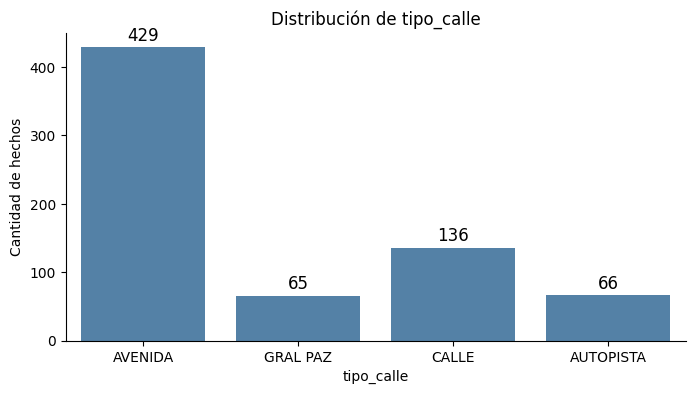

In [189]:
def plot_histogram(data, column):
    """
    Muestra un gráfico de barras con la cantidad de ocurrencias para una columna categórica
    y agrega etiquetas en cada barra que muestran el conteo.

    Parámetros:
    ----------
    data : pandas.DataFrame
        El conjunto de datos que contiene la información a graficar.
    column : str
        El nombre de la columna para la cual se creará el gráfico de barras.

    """
    plt.figure(figsize=(8, 4))
    
    # Gráfico de barras para datos categóricos
    ax = sns.countplot(data=data, x=column, color='steelblue')
    plt.xlabel(column)
    plt.ylabel('Cantidad de hechos')
    plt.title(f'Distribución de {column}')
    
    # Agregar etiquetas encima de cada barra
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                    textcoords='offset points')

    sns.despine()
    plt.show()

# Llamar la función con el DataFrame
plot_histogram(df_hechos_copy, 'tipo_calle')

    

Tanto en la tabla como en el gráfico podemos identificar que la mayor parte de los accidentes ocurren en Avenidas, son 429 casos que corresponden al 61% del total de siniestros viales, tanto si son en ubicaciones a la altura de una dirección en particular o en cruces con otras calles, avenidas o autopistas.

Respecto a las columnas altura y cruce revisaremos la relación que existe entre ellas: 

In [190]:
# Contar cuántas veces ambas columnas son nulas
ambos_nulos = df_hechos_copy[df_hechos_copy['altura'].isnull() & df_hechos_copy['cruce'].isnull()].shape[0]
print(f"Cantidad de filas donde 'altura' y 'cruce' son nulos: {ambos_nulos}")


Cantidad de filas donde 'altura' y 'cruce' son nulos: 42


Desplegamos las filas para revisar:

In [191]:
df_hechos_copy[df_hechos_copy['altura'].isnull() & df_hechos_copy['cruce'].isnull()].sample(10)

id  n_victimas      fecha  anio  mes  dia hora_exacta  hora  \
148  2017-0009           1 2017-01-16  2017    1   16    13:56:00    13   
643  2021-0045           1 2021-05-26  2021    5   26    17:24:00    17   
71   2016-0096           1 2016-07-25  2016    7   25    07:00:00     7   
234  2017-0112           2 2017-09-10  2017    9   10    09:32:17     9   
621  2021-0023           1 2021-03-01  2021    3    1    09:20:00     9   
180  2017-0050           2 2017-04-28  2017    4   28    11:08:08    11   
680  2021-0082           1 2021-11-06  2021   11    6    04:39:00     4   
655  2021-0057           1 2021-07-10  2021    7   10    23:30:00    23   
585  2020-0066           1 2020-12-07  2020   12    7    04:30:00     4   
631  2021-0033           1 2021-04-14  2021    4   14    17:50:00    17   

                                           lugar_hecho tipo_calle  ... comuna  \
148                          AU 25 DE MAYO Y AV. BOEDO  AUTOPISTA  ...      5   
643                           AU FRONDIZI Y SUAREZ AV.  AUTOPISTA  ...      4   
71        AUTOPISTA DELLEPIANE LUIS TTE. GRAL. KM. 2,3  AUTOPISTA  ...      8   
234                         AU 25 DE MAYO Y AV. VARELA  AUTOPISTA  ...      7   
621                   AU BUENOS AIRES LA PLATA  KM 4,5  AUTOPISTA  ...      4   
180            AU PERITO MORENO Y RAMAL ENLACE AU1/AU6  AUTOPISTA  ...      9   
680                   AU 25 DE MAYO KM7 (ALTURA PASCO)  AUTOPISTA  ...      3   
655           AU ILLIA KM 3.2, ALTURA CABINAS DE PEAJE  AUTOPISTA  ...      2   
585  AUTOPISTA PERITO MORENO ALTURA ESTACION DE TRE...  AUTOPISTA  ...     10   
631              AU 25 DE MAYO ALTURA BAJADA BOEDO AV.  AUTOPISTA  ...      5   

                               xy_geod_plana             latitud  \
148   Point (104341.1368196 100202.74363294)        -34.62743346   
643   Point (107903.91828587 98767.43091425)        -34.64035082   
71                               Point (. .)  -34.66684950051973   
234   Point (100479.14412395 98812.52258620)        -34.63997430   
621                              Point (. .)                   .   
180                              Point (. .)                   .   
680  Point (106179.07517962 100523.29161457)        -34.62453459   
655  Point (106489.89755339 105947.16700228)        -34.57563957   
585    Point (96471.01552298 99259.49298489)        -34.63593897   
631  Point (104341.13684161 100202.74307433)        -34.62743346   

               longitud     participantes victima      acusado categoria_hora  \
148        -58.41595919       MOTO-CARGAS    MOTO       CARGAS          tarde   
643        -58.37709334          MULTIPLE    MOTO     MULTIPLE          tarde   
71   -58.47433193007387       MOTO-CARGAS    MOTO       CARGAS         mañana   
234        -58.45807401  AUTO-OBJETO FIJO    AUTO  OBJETO FIJO         mañana   
621                   .       MOTO-CARGAS    MOTO       CARGAS         mañana   
180                   .       MOTO-CARGAS    MOTO       CARGAS         mañana   
680        -58.39591856         MOTO-AUTO    MOTO         AUTO          noche   
655        -58.39257023  AUTO-OBJETO FIJO    AUTO  OBJETO FIJO    tarde-noche   
585        -58.50178784  MOTO-OBJETO FIJO    MOTO  OBJETO FIJO          noche   
631        -58.41595919  AUTO-OBJETO FIJO    AUTO  OBJETO FIJO          tarde   

    nombre_dia     laboral  
148      lunes     Laboral  
643  miércoles     Laboral  
71       lunes     Laboral  
234    domingo  No Laboral  
621      lunes     Laboral  
180    viernes     Laboral  
680     sábado  No Laboral  
655     sábado  No Laboral  
585      lunes     Laboral  
631  miércoles     Laboral  

[10 rows x 24 columns]

De aquí se desprende que, donde no existe ni altura y cruce identificados, corresponden casi en su totalidad a tipo_calle del tipo Autopista, salvo para el hecho con id 2016-0151, donde se clasifica el hecho con tipo_calle como CALLE, pero en realidad no tenemos referencias del lugar en donde ocurre el siniestro. Esto se interpreta dado que las autopistas tienden a estar lejanas a las calles o avenidas donde sí existe numeración cercana de referencia, y muchas veces las autopistas suelen ser elevadas o subterráneas.

In [192]:
# Contar cuántas veces sólo 'altura' es nulo y 'cruce' no lo es
altura_nulo = df_hechos_copy[df_hechos_copy['altura'].isnull() &  df_hechos_copy['cruce'].notnull()].shape[0]
print(f"Cantidad de filas donde 'altura' es nulo y 'cruce' no es nulo: {altura_nulo}")

altura_nulo_datos=df_hechos_copy[df_hechos_copy['altura'].isnull() &  df_hechos_copy['cruce'].notnull()]
print(f"Distribuición por tipo de calle :", altura_nulo_datos['tipo_calle'].value_counts())



Cantidad de filas donde 'altura' es nulo y 'cruce' no es nulo: 525
Distribuición por tipo de calle : tipo_calle
AVENIDA      352
CALLE         90
GRAL PAZ      56
AUTOPISTA     27
Name: count, dtype: int64


La mayor parte de los casos donde la altura es nula y el cruce no, corresponden a cruces con avenidas. Se podría intuir que esto corresponde debido a la gran cantidad de avenidas y por ende cruces con avenidas, mayor flujo vehicular de las avenidas, que producen más atochamientos y la mayor velocidad a la que conducen los conductores en este tipo de vías, respecto de la velocidad que usan en calles, por ejemplo. (según https://www.argentina.gob.ar/transito/consejos-para-circular, en calles la velocidad permitida es de 40 km/hr, en avenida es 60 km/hr y en semiautopistas y autopistas 120 km/hr).
Existen 27 casos en donde los siniestros viales sucedieron en cruces con autopistas. Si bien en autopistas la velocidad es más alta, los cruces con autopistas son mucho menores y son menos la cantidad de autopistas dentro de una ciudad.

Veamos el caso en donde el cruce esta vez es nulo y la altura no lo es:

In [193]:
# Contar cuántas veces 'cruce' es nulo y 'altura' no lo es
cruce_nulo = df_hechos_copy[df_hechos_copy['cruce'].isnull() & df_hechos_copy['altura'].notnull()].shape[0]
print(f"Cantidad de filas donde 'cruce' es nulo y 'altura' no lo es: {cruce_nulo}")

cruce_nulo_datos = df_hechos_copy[df_hechos_copy['cruce'].isnull() & df_hechos_copy['altura'].notnull()]
print(f"Distribuición por tipo de calle :", cruce_nulo_datos['tipo_calle'].value_counts())


Cantidad de filas donde 'cruce' es nulo y 'altura' no lo es: 129
Distribuición por tipo de calle : tipo_calle
AVENIDA     77
CALLE       44
GRAL PAZ     8
Name: count, dtype: int64


Aquí podemos confirmar que la altura sólo la encontramos en tipos de calle AVENIDA, CALLE y GRAL PAZ, donde es fácil referenciar una altura específica al momento de reportar la ocurrencia de un siniestro vial.

* Columna direccion_norma

Ya habíamos identificado 8 datos nulos para esta columna, los revisamos de inmediato:


In [194]:
df_hechos_copy[df_hechos_copy['direccion_norm'].isnull()]

id  n_victimas      fecha  anio  mes  dia hora_exacta  hora  \
38   2016-0052           1 2016-04-20  2016    4   20    20:00:00    20   
106  2016-0136           1 2016-10-25  2016   10   25    00:00:00     0   
119  2016-0151           1 2016-11-18  2016   11   18    20:35:00    20   
180  2017-0050           2 2017-04-28  2017    4   28    11:08:08    11   
181  2017-0051           1 2017-05-01  2017    5    1    03:47:47     3   
313  2018-0039           1 2018-04-21  2018    4   21    22:15:00    22   
546  2020-0026           1 2020-05-17  2020    5   17    06:40:00     6   
621  2021-0023           1 2021-03-01  2021    3    1    09:20:00     9   

                                 lugar_hecho tipo_calle  ... comuna  \
38                AUTOPISTA LUGONES PK 10000  AUTOPISTA  ...     13   
106         AU BUENOS AIRES - LA PLATA KM. 4  AUTOPISTA  ...      4   
119                                       SD      CALLE  ...      0   
180  AU PERITO MORENO Y RAMAL ENLACE AU1/AU6  AUTOPISTA  ...      9   
181                       AU DELLEPIANE 2400  AUTOPISTA  ...      7   
313                 AUTOPISTA LUGONES KM 4.7  AUTOPISTA  ...     14   
546             LUGONES, LEOPOLDO AV. KM 6,1  AUTOPISTA  ...     14   
621         AU BUENOS AIRES LA PLATA  KM 4,5  AUTOPISTA  ...      4   

     xy_geod_plana latitud longitud     participantes victima      acusado  \
38     Point (. .)       .        .           MOTO-SD    MOTO           SD   
106    Point (. .)       .        .       MOTO-CARGAS    MOTO       CARGAS   
119    Point (. .)       .        .         PEATON-SD  PEATON           SD   
180    Point (. .)       .        .       MOTO-CARGAS    MOTO       CARGAS   
181    Point (. .)       .        .         AUTO-AUTO    AUTO         AUTO   
313    Point (. .)       .        .       PEATON-AUTO  PEATON         AUTO   
546    Point (. .)       .        .  MOTO-OBJETO FIJO    MOTO  OBJETO FIJO   
621    Point (. .)       .        .       MOTO-CARGAS    MOTO       CARGAS   

    categoria_hora nombre_dia     laboral  
38     tarde-noche  miércoles     Laboral  
106          noche     martes     Laboral  
119    tarde-noche    viernes     Laboral  
180         mañana    viernes     Laboral  
181          noche      lunes     Laboral  
313    tarde-noche     sábado  No Laboral  
546         mañana    domingo  No Laboral  
621         mañana      lunes     Laboral  

[8 rows x 24 columns]

Todos los datos en donde falta la dirección normalizada corresponden a autopistas. Copiamos los valores de lugar_hecho.

In [195]:
df_hechos_copy['direccion_norm'].fillna(df_hechos_copy['lugar_hecho'], inplace=True)

Verificamos los cambios

In [196]:
valores_faltantes(df_hechos_copy)

id n_victimas           fecha   anio    mes    dia  \
Total Nulos             0          0               0      0      0      0   
Porcentaje Nulos      0.0        0.0             0.0    0.0    0.0    0.0   
Total Vacios            0          0               0      0      0      0   
Porcentaje Vacios     0.0        0.0             0.0    0.0    0.0    0.0   
Total SD                0          0               0      0      0      0   
Porcentaje SD         0.0        0.0             0.0    0.0    0.0    0.0   
Tipos              object      int64  datetime64[ns]  int64  int64  int64   

                  hora_exacta   hora lugar_hecho tipo_calle  ... comuna  \
Total Nulos                 0      0           0          0  ...      0   
Porcentaje Nulos          0.0    0.0         0.0        0.0  ...    0.0   
Total Vacios                0      0           0          0  ...      0   
Porcentaje Vacios         0.0    0.0         0.0        0.0  ...    0.0   
Total SD                    0      0           1          0  ...      0   
Porcentaje SD             0.0    0.0    0.143678        0.0  ...    0.0   
Tipos                  object  int64      object     object  ...  int64   

                  xy_geod_plana latitud longitud participantes   victima  \
Total Nulos                   0       0        0             0         0   
Porcentaje Nulos            0.0     0.0      0.0           0.0       0.0   
Total Vacios                  0       0        0             0         0   
Porcentaje Vacios           0.0     0.0      0.0           0.0       0.0   
Total SD                      0       0        0             0         9   
Porcentaje SD               0.0     0.0      0.0           0.0  1.293103   
Tipos                    object  object   object        object    object   

                    acusado categoria_hora nombre_dia laboral  
Total Nulos               0              0          0       0  
Porcentaje Nulos        0.0            0.0        0.0     0.0  
Total Vacios              0              0          0       0  
Porcentaje Vacios       0.0            0.0        0.0     0.0  
Total SD                 23              0          0       0  
Porcentaje SD      3.304598            0.0        0.0     0.0  
Tipos                object         object     object  object  

[7 rows x 24 columns]

* Columna xy_geod_plana  

Decido eliminar esta columna dado que no la necesitaré, usaré latitud y longitud para identificar la ubicación geográfica si es necesario.

In [197]:
df_hechos_copy.drop('xy_geod_plana', axis=1, inplace=True)

Columna Latitud y Longitud

Revisamos de inmediato los datos faltantes de las columnas latitud y longitud que actualmente poseen un '.'

In [198]:
df_hechos_copy[(df_hechos_copy['latitud'] == '.') | (df_hechos_copy['longitud'] == '.')]


id  n_victimas      fecha  anio  mes  dia hora_exacta  hora  \
38   2016-0052           1 2016-04-20  2016    4   20    20:00:00    20   
106  2016-0136           1 2016-10-25  2016   10   25    00:00:00     0   
119  2016-0151           1 2016-11-18  2016   11   18    20:35:00    20   
139  2016-0174           1 2016-12-27  2016   12   27    00:00:00     0   
176  2017-0042           1 2017-04-10  2017    4   10    09:00:00     9   
180  2017-0050           2 2017-04-28  2017    4   28    11:08:08    11   
181  2017-0051           1 2017-05-01  2017    5    1    03:47:47     3   
256  2017-0140           1 2017-11-19  2017   11   19    23:22:17    23   
313  2018-0039           1 2018-04-21  2018    4   21    22:15:00    22   
546  2020-0026           1 2020-05-17  2020    5   17    06:40:00     6   
559  2020-0039           1 2020-09-01  2020    9    1    19:17:42    19   
621  2021-0023           1 2021-03-01  2021    3    1    09:20:00     9   

                                 lugar_hecho tipo_calle  ...  \
38                AUTOPISTA LUGONES PK 10000  AUTOPISTA  ...   
106         AU BUENOS AIRES - LA PLATA KM. 4  AUTOPISTA  ...   
119                                       SD      CALLE  ...   
139                     AUTOPISTA 25 DE MAYO  AUTOPISTA  ...   
176            AV. LEOPOLDO LUGONES PKM 6900   GRAL PAZ  ...   
180  AU PERITO MORENO Y RAMAL ENLACE AU1/AU6  AUTOPISTA  ...   
181                       AU DELLEPIANE 2400  AUTOPISTA  ...   
256              AU ARTURO FRONDIZI PKM 3100  AUTOPISTA  ...   
313                 AUTOPISTA LUGONES KM 4.7  AUTOPISTA  ...   
546             LUGONES, LEOPOLDO AV. KM 6,1  AUTOPISTA  ...   
559                          MURGUIONDO 2700      CALLE  ...   
621         AU BUENOS AIRES LA PLATA  KM 4,5  AUTOPISTA  ...   

                                 direccion_norm  comuna latitud longitud  \
38                   AUTOPISTA LUGONES PK 10000      13       .        .   
106            AU BUENOS AIRES - LA PLATA KM. 4       4       .        .   
119                                          SD       0       .        .   
139                        AUTOPISTA 25 DE MAYO       0       .        .   
176                       LUGONES, LEOPOLDO AV.      14       .        .   
180     AU PERITO MORENO Y RAMAL ENLACE AU1/AU6       9       .        .   
181                          AU DELLEPIANE 2400       7       .        .   
256  AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI       4       .        .   
313                    AUTOPISTA LUGONES KM 4.7      14       .        .   
546                LUGONES, LEOPOLDO AV. KM 6,1      14       .        .   
559                                  MURGUIONDO       9       .        .   
621            AU BUENOS AIRES LA PLATA  KM 4,5       4       .        .   

        participantes victima      acusado categoria_hora nombre_dia  \
38            MOTO-SD    MOTO           SD    tarde-noche  miércoles   
106       MOTO-CARGAS    MOTO       CARGAS          noche     martes   
119         PEATON-SD  PEATON           SD    tarde-noche    viernes   
139             SD-SD      SD           SD          noche     martes   
176       MOTO-CARGAS    MOTO       CARGAS         mañana      lunes   
180       MOTO-CARGAS    MOTO       CARGAS         mañana    viernes   
181         AUTO-AUTO    AUTO         AUTO          noche      lunes   
256    MOTO-PASAJEROS    MOTO    PASAJEROS    tarde-noche    domingo   
313       PEATON-AUTO  PEATON         AUTO    tarde-noche     sábado   
546  MOTO-OBJETO FIJO    MOTO  OBJETO FIJO         mañana    domingo   
559     PEATON-CARGAS  PEATON       CARGAS    tarde-noche     martes   
621       MOTO-CARGAS    MOTO       CARGAS         mañana      lunes   

        laboral  
38      Laboral  
106     Laboral  
119     Laboral  
139     Laboral  
176     Laboral  
180     Laboral  
181     Laboral  
256  No Laboral  
313  No Laboral  
546  No Laboral  
559     Laboral  
621     Laboral  

[12 rows x 23 columns]

Existe un siniestro vial cuyo lugar_hecho está catalogado como 'SD' (sin dato según diccionario de datos), cuya comuna es no válida (o), no posee puntos geográficos y acusado se desconoce. Por otro lado, encontramos en estos datos un hecho vial ocurrido en la autopista 25 de mayo, en donde tampoco se conocen los participantes, el vehículo que ocupaban los participantes del hecho, víctima y acusado y la comuna. En este caso sí sabemos que el accidente ocurrió en la autopista 25 de mayo, pero tras investigar, ésta atraviesa 5 comunas, la 1, 5, 3, 7 y 9. Por tanto tampoco podríamos estimar siquiera un dato cercano de la ubicación del accidente. Aún así, y tartandose de estadísticas de personas fallecidas o lesionadas, decido no eliminar las columnas ya que afectarían los indicadores que nos planteemos.

Se actualizan los valores de altura, latitud y longitud para los siniestros 2017-0051 y 2020-0039, correspondientes a los lugares AU DELLEPIANE 2400 y MURGUIONDO 2700.

In [199]:
df_hechos_copy.loc[df_hechos_copy['id'] == '2017-0051', ['altura', 'latitud', 'longitud']] = [2400, '-34.649889', '-58.465671']
df_hechos_copy.loc[df_hechos_copy['id'] == '2020-0039', ['altura', 'latitud', 'longitud']] = [2700,'-34.663399', '-58.493318']


Para los 8 casos restantes, todos ubicados en autopistas, el lugar_hecho sólo indica el punto kilométrico (PK) que no me permite identificar el punto exacto del siniestro vial. No me parece correcto eliminar estas filas sólo por los valores faltantes de dos columnas, por tanto elijo el método de imputación de valor arbitrario dentro de una comuna específica, pero en zonas que están sobre parques o estadio para claramente distinguir estos casos de imputación arbitraria. Seleccionan los valores arbitrarios identificando cada comuna y un punto geográfico localizado sobre un parque o estadio.

In [200]:
comuna_4= [-34.636330, -58.394431] # Parque Florentino Ameghino
comuna_7= [-34.634441, -58.441393] # Parque Chacabuco
comuna_9= [-34.644875, -58.478978] # Parque Avellaneda
comuna_13= [-34.545385, -58.449728] # Estadio monumental
comuna_14= [-34.570380, -58.416724] # Parque Tres de febrereo

# opción alternativa: reserva ecológica de buenos aires, ubicada en -34.607372, -58.351061 

Se asignan puntos geográficos arbitrarios dentro de cada comuna, con tal de identificar datos imputados

In [201]:
# asignación de puntos geográficos arbitrarios dentro de la comuna, según condición de comuna
df_hechos_copy.loc[(df_hechos_copy['latitud'] == '.') & (df_hechos_copy['comuna'] == '4'), ['latitud', 'longitud']] = comuna_4
df_hechos_copy.loc[(df_hechos_copy['latitud'] == '.') & (df_hechos_copy['comuna'] == '7'), ['latitud', 'longitud']] = comuna_7
df_hechos_copy.loc[(df_hechos_copy['latitud'] == '.') & (df_hechos_copy['comuna'] == '9'), ['latitud', 'longitud']] = comuna_9
df_hechos_copy.loc[(df_hechos_copy['latitud'] == '.') & (df_hechos_copy['comuna'] == '13'), ['latitud', 'longitud']] = comuna_13
df_hechos_copy.loc[(df_hechos_copy['latitud'] == '.') & (df_hechos_copy['comuna'] == '14'), ['latitud', 'longitud']] = comuna_14

Verificamos los cambios realizados

In [202]:
df_hechos_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              696 non-null    object        
 1   n_victimas      696 non-null    int64         
 2   fecha           696 non-null    datetime64[ns]
 3   anio            696 non-null    int64         
 4   mes             696 non-null    int64         
 5   dia             696 non-null    int64         
 6   hora_exacta     696 non-null    object        
 7   hora            696 non-null    int64         
 8   lugar_hecho     696 non-null    object        
 9   tipo_calle      696 non-null    object        
 10  calle           695 non-null    object        
 11  altura          131 non-null    float64       
 12  cruce           525 non-null    object        
 13  direccion_norm  696 non-null    object        
 14  comuna          696 non-null    int64         
 15  latitu

* Columna participantes, victima y acusado.  

Respecto a las columnas Participantes, Victimas y Acusado, en la primera columna no tenemos valores vacíos ni faltantes, pero si en columna victima y acusado, donde tenemos valores sin dato ('SD') el cual lo dejamos tal cual dado que sólo representan el 1.29% y 3.3% del total respectivamente, además de no contar con información para completar estos datos.

In [203]:
valores_faltantes(df_hechos_copy[['participantes', 'victima', 'acusado']])

participantes   victima   acusado
Total Nulos                   0         0         0
Porcentaje Nulos            0.0       0.0       0.0
Total Vacios                  0         0         0
Porcentaje Vacios           0.0       0.0       0.0
Total SD                      0         9        23
Porcentaje SD               0.0  1.293103  3.304598
Tipos                    object    object    object

## Eliminación de columnas que no se utilizarán

Finalmente eliminamos las columnas que no utilizaremos para nuestro análisis por ser redundantes, como es el caso de 'lugar_hecho' o 'altura' por ser ya analizada y utilizada en el análisis.

In [204]:
df_hechos_copy = df_hechos_copy.drop(['lugar_hecho', 'altura'], axis=1)

## Reordenamiento de columnas

Por último reordenamos las columnas:

In [205]:
df_hechos_copy.columns

Index(['id', 'n_victimas', 'fecha', 'anio', 'mes', 'dia', 'hora_exacta',
       'hora', 'tipo_calle', 'calle', 'cruce', 'direccion_norm', 'comuna',
       'latitud', 'longitud', 'participantes', 'victima', 'acusado',
       'categoria_hora', 'nombre_dia', 'laboral'],
      dtype='object')

In [206]:
df_hechos_copy = df_hechos_copy[['id', 'n_victimas', 'fecha', 'anio', 'mes', 'dia', 'nombre_dia', 'laboral','hora_exacta',
       'hora', 'categoria_hora', 'tipo_calle', 'calle', 'cruce',
       'direccion_norm', 'comuna', 'latitud','longitud',
       'participantes', 'victima', 'acusado']]

# Análisis Exploratorio Victimas

Realizamos una copia del df_victimas para realizar las transformaciones y no afectar el df original.

In [207]:
df_victimas_copy=df_victimas.copy()

## Eliminando Duplicados 

In [208]:
# Contar el número de filas duplicadas
conteo_duplicados = df_victimas_copy.duplicated().sum()

# Mostrar el resultado
print(f"Cantidad de filas duplicadas en df_items_copy: {conteo_duplicados}")


Cantidad de filas duplicadas en df_items_copy: 0


No existen duplicados en el dataframe.

In [209]:
df_victimas_copy.sample(10)

ID_hecho       FECHA  AAAA  MM  DD                   ROL VICTIMA  \
153  2017-0012  24-01-2017  2017   1  24             CONDUCTOR    MOTO   
441  2019-0007  26-01-2019  2019   1  26             CONDUCTOR    MOTO   
577  2020-0038  30-08-2020  2020   8  30             CONDUCTOR    AUTO   
282  2017-0158  18-12-2017  2017  12  18             CONDUCTOR    MOTO   
209  2017-0075  12-06-2017  2017   6  12                PEATON  PEATON   
529  2019-0094  18-11-2019  2019  11  18  PASAJERO_ACOMPAÑANTE    MOTO   
371  2018-0083  02-08-2018  2018   8   2             CONDUCTOR    MOTO   
184  2017-0047  23-04-2017  2017   4  23             CONDUCTOR    MOTO   
494  2019-0059  13-07-2019  2019   7  13             CONDUCTOR    MOTO   
638  2021-0019  21-02-2021  2021   2  21             CONDUCTOR    MOTO   

          SEXO EDAD FECHA_FALLECIMIENTO  
153  MASCULINO   30          24-01-2017  
441  MASCULINO   35          26-01-2019  
577  MASCULINO   64          30-08-2020  
282  MASCULINO   32          18-12-2017  
209  MASCULINO   55          12-06-2017  
529   FEMENINO   SD          18-11-2019  
371  MASCULINO   SD          02-08-2018  
184  MASCULINO   37          23-04-2017  
494  MASCULINO   30          13-07-2019  
638  MASCULINO   30          21-02-2021

## Estandarizar nombre de columnas

Cambiar nombre de columnas a minúsculas para estandarizar, y renombramos la columna id_hecho a id.

In [210]:
# pasan todos los nombres de columnas a minúsculas
df_victimas_copy.columns = df_victimas_copy.columns.str.lower()

Modificar algunas columnas poco claras:

In [211]:
df_victimas_copy.rename(columns={'id_hecho':'id','aaaa':'anio','mm':'mes', 'dd':'dia'}, inplace=True)

Verificamos los cambios

In [212]:
df_victimas_copy.sample()

id       fecha  anio  mes  dia        rol victima       sexo edad  \
489  2019-0054  20-06-2019  2019    6   20  CONDUCTOR    MOTO  MASCULINO   21   

    fecha_fallecimiento  
489          20-06-2019

# Análisis general df victimas

In [213]:
df_victimas_copy.shape

(717, 10)

el dataframe tiene 717 registros, con 10 columnas.

In [214]:
df_victimas_copy.sample(10)

id       fecha  anio  mes  dia                   rol victima  \
600  2020-0061  03-12-2020  2020   12    3             CONDUCTOR    MOTO   
103  2016-0131  09-10-2016  2016   10    9                PEATON  PEATON   
207  2017-0073  04-06-2017  2017    6    4             CONDUCTOR    MOTO   
413  2018-0123  12-11-2018  2018   11   12             CONDUCTOR    AUTO   
473  2019-0038  04-05-2019  2019    5    4                PEATON  PEATON   
438  2019-0004  14-01-2019  2019    1   14             CONDUCTOR    AUTO   
163  2017-0026  26-02-2017  2017    2   26  PASAJERO_ACOMPAÑANTE    AUTO   
204  2017-0069  29-05-2017  2017    5   29             CONDUCTOR    MOTO   
475  2019-0039  09-05-2019  2019    5    9             CONDUCTOR    MOTO   
433  2018-0142  25-12-2018  2018   12   25  PASAJERO_ACOMPAÑANTE  CARGAS   

          sexo edad fecha_fallecimiento  
600  MASCULINO   45          04-12-2020  
103  MASCULINO   35                  SD  
207  MASCULINO   19          04-06-2017  
413  MASCULINO   25          12-11-2018  
473   FEMENINO   42          05-05-2019  
438  MASCULINO   71          14-01-2019  
163   FEMENINO   23          26-02-2017  
204  MASCULINO   39          29-05-2017  
475  MASCULINO   28          09-05-2019  
433  MASCULINO   32          01-01-2019

No existen nulos en el dataframe.

En esta base de datos cada registro representa un fallecido/lesionado con los datos de código del hecho, fecha del siniestro vial (año, mes y día separados también), rol relativo del fallecido/lesionado respecto al vehículo al momento del siniestro, 
la victima asociada al accidente en la que estuvo involucrado el fallecido/lesionado, el sexo, edad y fecha de fallecimiento si es que la víctima asociada a la fila falleció dentro de los 30 días posteriores al accidente. Esto significa que tendremos id que se repiten en la base de datos.

In [215]:
valores_faltantes(df_victimas_copy)

id   fecha   anio    mes    dia      rol  victima  \
Total Nulos             0       0      0      0      0        0        0   
Porcentaje Nulos      0.0     0.0    0.0    0.0    0.0      0.0      0.0   
Total Vacios            0       0      0      0      0        0        0   
Porcentaje Vacios     0.0     0.0    0.0    0.0    0.0      0.0      0.0   
Total SD                0       0      0      0      0       11        9   
Porcentaje SD         0.0     0.0    0.0    0.0    0.0  1.53417  1.25523   
Tipos              object  object  int64  int64  int64   object   object   

                      sexo      edad fecha_fallecimiento  
Total Nulos              0         0                   0  
Porcentaje Nulos       0.0       0.0                 0.0  
Total Vacios             0         0                   0  
Porcentaje Vacios      0.0       0.0                 0.0  
Total SD                 6        53                  68  
Porcentaje SD      0.83682  7.391911            9.483961  
Tipos               object    object              object

In [216]:
valores_frecuentes_unicos(df_victimas_copy)

id       fecha    anio     mes    dia  \
Total                         717         717     717     717    717   
Valores más frecuentes  2017-0035  26-02-2017    2018      12     20   
Frecuencia                      3           3     149      81     32   
Porcentaje                  0.418       0.418  20.781  11.297  4.463   
Valores únicos                696         598       6      12     31   

                              rol victima       sexo   edad  \
Total                         717     717        717    717   
Valores más frecuentes  CONDUCTOR    MOTO  MASCULINO     SD   
Frecuencia                    330     303        545     53   
Porcentaje                 46.025  42.259     76.011  7.392   
Valores únicos                  5       8          3     86   

                       fecha_fallecimiento  
Total                                  717  
Valores más frecuentes                  SD  
Frecuencia                              68  
Porcentaje                           9.484  
Valores únicos                         563

Existen 717 registros de víctimas, donde, si bien no tenemos nulos, tenemos valores sin datos indicados con 'SD'. Esto ocurre en las columnas rol, sexo, edad, y fecha de fallecimiento. En el caso de la fecha de fallecimiento, hay que tener en cuenta que también existen lesionados por tanto no es raro que se encuentre vacía. Respecto a los valores más frecuentes del dataset, podemos indicar que la mayor cantidad de registros están en el año 2018. De forma global también, el mes de diciembre es donde existen más víctimas registradas con un total de 81. Casi la mitad de las víctimas, un 46% eran conductores de los vehículos siniestrados, con un total de 330 siniestros viales involucrados. Las hombres representan un 79% de las víctimas de siniestros viales entre los años estudiados. Respecto a la edad, la edad más frecuente es la 'SD'. Respecto a la fecha de fallecimiento, podemos afirmar que al menos 562 personas fallecieron ya que su fecha de fallecimiento se encuentra registrada.


Tipos de Datos:

Las fechas de este dataframe necesitamos pasarlo a tipo datetime, al igual que en el caso del dataframe anterior.  Estos casos son fecha y fecha_fallecimiento. Edad la podemos pasar a tipo entero aun cuando existen 53 registros que son del tipo object.

In [217]:
#Análisis de datos por tipo de entrada en cada uno de los campos categóricos
categoricas = df_victimas_copy[['rol','victima','sexo', 'edad']]
for i in categoricas:
    print('\nLos valores únicos de', i ,' son: ', categoricas[i].unique())


Los valores únicos de rol  son:  ['CONDUCTOR' 'PASAJERO_ACOMPAÑANTE' 'PEATON' 'SD' 'CICLISTA']

Los valores únicos de victima  son:  ['MOTO' 'AUTO' 'PEATON' 'SD' 'CARGAS' 'BICICLETA' 'PASAJEROS' 'MOVIL']

Los valores únicos de sexo  son:  ['MASCULINO' 'FEMENINO' 'SD']

Los valores únicos de edad  son:  ['19' '70' '30' '18' '29' '22' '16' '59' '65' '34' '41' '50' '38' '21'
 '52' '36' '20' '54' 'SD' '56' '24' '78' '79' '26' '57' '37' '58' '23'
 '60' '42' '53' '51' '40' '87' '76' '75' '35' '80' '43' '45' '67' '27'
 '55' '49' '81' '25' '33' '46' '83' '39' '28' '7' '48' '4' '82' '32' '17'
 '47' '61' '10' '95' '73' '84' '66' '85' '1' '15' '13' '77' '44' '31' '62'
 '74' '71' '11' '86' '69' '72' '12' '63' '92' '68' '91' '64' '5' '88']


## Ajuste tipos de datos

* columna fecha

Se modifica tipo de dato a daytime y se verifican los cambios 

In [218]:
df_victimas_copy["fecha"] = pd.to_datetime(df_victimas_copy["fecha"], errors='coerce', format='%d-%m-%Y')
df_victimas_copy['fecha'].apply(type).value_counts()

fecha
<class 'pandas._libs.tslibs.timestamps.Timestamp'>    717
Name: count, dtype: int64

* fecha_fallecimiento

* Se identifica que hay al menos un valor separado con '/', por tanto buscamos las filas con este problemas y hacemos las modificaciones

In [219]:
# Buscar filas donde el separador sea '/'
df_con_slash = df_victimas_copy[df_victimas_copy["fecha_fallecimiento"].str.contains('/', na=False)]
df_con_slash

id      fecha  anio  mes  dia        rol victima       sexo edad  \
454  2019-0019 2019-03-06  2019    3    6  CONDUCTOR    MOTO  MASCULINO   SD   

    fecha_fallecimiento  
454          26/03/2019

In [220]:
# Reemplazar el separador '/' por '-'
df_victimas_copy["fecha_fallecimiento"] = df_victimas_copy["fecha_fallecimiento"].astype(str).str.replace("/", "-")



In [221]:
# Se realiza la conversión a datetime
df_victimas_copy["fecha_fallecimiento"] = pd.to_datetime(df_victimas_copy["fecha_fallecimiento"], format='%d-%m-%Y', errors='coerce')

Verificamos el cambio de tipos de datos y la transformación de 'SD' a nulos.

In [222]:
valores_faltantes(df_victimas_copy[['fecha_fallecimiento']])

fecha_fallecimiento
Total Nulos                        68
Porcentaje Nulos             9.483961
Total Vacios                        0
Porcentaje Vacios                 0.0
Total SD                            0
Porcentaje SD                     0.0
Tipos                  datetime64[ns]

Finamente tratamos estos nulos reemplazándolos por '' para manipularlos correctamente.

In [223]:
# se transforma a  formato fecha sin hora
df_victimas_copy["fecha_fallecimiento"] = df_victimas_copy["fecha_fallecimiento"].dt.date

#Luego se reemplazan las fechas en cero con espacios vacios a fin de su manipulación
df_victimas_copy["fecha_fallecimiento"] = df_victimas_copy["fecha_fallecimiento"].replace(pd.NaT,"")

Verificamos los cambios de 68 valores nulos a vacíos

In [224]:
valores_faltantes(df_victimas_copy[['fecha_fallecimiento']])

fecha_fallecimiento
Total Nulos                         0
Porcentaje Nulos                  0.0
Total Vacios                       68
Porcentaje Vacios            9.483961
Total SD                            0
Porcentaje SD                     0.0
Tipos                          object

* Columna Edad

Para esta columna reemplazaremos los valores 'SD' o vacíos a nulos, y luego rellenamos los valores de edad con ceros.

In [225]:
#Reemplazo los valores vacíos o sin datos y los paso a tipo flat
df_victimas_copy["edad"] = df_victimas_copy["edad"].replace([" ","SD"], np.nan)

Verificamos los cambios

In [226]:
valores_faltantes(df_victimas_copy[['edad']])


edad
Total Nulos              53
Porcentaje Nulos   7.391911
Total Vacios              0
Porcentaje Vacios       0.0
Total SD                  0
Porcentaje SD           0.0
Tipos                object

Luego de transformarlos a nulos, se crea una nueva columna categoria_edad, que usa las edades de la columna edad, y las agrupa en categorías. Cada categoría agrupa edades de 20 en 20 para identificar rangos de edad en las que es más frecuente que sean afectados por accidentes viales.

In [227]:
# Se convierte la columna 'edad' a numérica. Valores no numéricos serán convertidos a NaN.
df_victimas_copy['edad'] = pd.to_numeric(df_victimas_copy['edad'], errors='coerce')

# Función para categorizar la edad
def categorizar_edad(edad):

    '''  Categoriza una edad en rangos predefinidos.'''

    if pd.isnull(edad):
        return 'edad_desconocida'
    if 0 <= edad < 20:
        return 'entre_0_y_20'
    elif 20 <= edad < 40:
        return 'entre_20_y_40'
    elif 40 <= edad < 60:
        return 'entre_40_y_60'
    elif 60 <= edad < 80:
        return 'entre_60_y_80'
    else:
        return 'mas_de_80'

# Se aplica la función a la columna 'edad' para crear la nueva columna 'categoria_edad'
df_victimas_copy['categoria_edad'] = df_victimas_copy['edad'].apply(categorizar_edad)

# Se muestra las primeras filas para verificar
print(df_victimas_copy[['edad', 'categoria_edad']].head())

   edad categoria_edad
0  19.0   entre_0_y_20
1  70.0  entre_60_y_80
2  30.0  entre_20_y_40
3  18.0   entre_0_y_20
4  29.0  entre_20_y_40


Finalmente, los nulos en la columna edad los transformamos en 0s. 

In [228]:
df_victimas_copy["edad"] = df_victimas_copy["edad"].fillna(0.0)

In [229]:
valores_faltantes(df_victimas_copy[['edad']])

edad
Total Nulos              0
Porcentaje Nulos       0.0
Total Vacios             0
Porcentaje Vacios      0.0
Total SD                 0
Porcentaje SD          0.0
Tipos              float64

Para las columnas Victimas, Sexo y rol, mantendremos la asignación 'SD' dado que la cantidad de datos faltantes para cada columna no sobrepara el 2% de los datos y aplicar un asignación como media o mediana a datos tan sensibles no me parece adecuada. Por lo mismo tampoco decido eliminarlos ya que la base de datos es pequeña y puede afectar los resultados de víctimas de un año y nos puede llevar a conclusiones equivocadas.

* Columnas rol, victima y sexo

In [230]:
valores_faltantes(df_victimas_copy[['rol', 'victima','sexo']])

rol  victima     sexo
Total Nulos              0        0        0
Porcentaje Nulos       0.0      0.0      0.0
Total Vacios             0        0        0
Porcentaje Vacios      0.0      0.0      0.0
Total SD                11        9        6
Porcentaje SD      1.53417  1.25523  0.83682
Tipos               object   object   object

Para estas columnas rol, victimas y sexo, los valores sin dato 'SD' representan menos del 2% de los valores totales.

Revisamos los 11 registros sin datos de la columna rol:

In [231]:
df_victimas_copy[df_victimas_copy['rol']=='SD']

id      fecha  anio  mes  dia rol victima       sexo  edad  \
36   2016-0049 2016-04-17  2016    4   17  SD      SD         SD   0.0   
39   2016-0052 2016-04-20  2016    4   20  SD    MOTO         SD   0.0   
63   2016-0085 2016-06-29  2016    6   29  SD    MOTO  MASCULINO   0.0   
77   2016-0101 2016-08-07  2016    8    7  SD      SD  MASCULINO  67.0   
89   2016-0115 2016-09-02  2016    9    2  SD      SD  MASCULINO   0.0   
141  2016-0174 2016-12-27  2016   12   27  SD      SD         SD   0.0   
167  2017-0029 2017-03-07  2017    3    7  SD      SD  MASCULINO  34.0   
208  2017-0074 2017-06-04  2017    6    4  SD      SD  MASCULINO  70.0   
221  2017-0089 2017-07-13  2017    7   13  SD      SD  MASCULINO  23.0   
280  2017-0155 2017-12-12  2017   12   12  SD      SD  MASCULINO  77.0   
390  2018-0100 2018-09-20  2018    9   20  SD    MOTO   FEMENINO  33.0   

    fecha_fallecimiento    categoria_edad  
36                       edad_desconocida  
39                       edad_desconocida  
63                       edad_desconocida  
77                          entre_60_y_80  
89                       edad_desconocida  
141                      edad_desconocida  
167          2017-03-07     entre_20_y_40  
208          2017-06-04     entre_60_y_80  
221                         entre_20_y_40  
280                         entre_60_y_80  
390          2018-09-20     entre_20_y_40

El rol se refiere al rol que ocupaba la víctima en el móvil que se desplazaba (ya sea conductor, peatón, pasajero etc), 
 
En la mayor parte de los casos, si el rol de la víctima es 'SD', sin dato, el mismo dato posee la columna victima, al menos 8 de los 9 valores 'SD' de victima se explican por ello. Respecto a los 6 datos faltantes de sexo, 3 también coinciden con valor 'SD' si el Rol también indica 'SD'.

Para las columnas Victimas, Sexo y rol, mantendremos la asignación 'SD' dado que la cantidad de datos faltantes para cada columna no sobrepara el 2% de los datos y aplicar un asignación como media o mediana a datos tan sensibles no me parece adecuada. Por lo mismo tampoco decido eliminarlos ya que la base de datos es pequeña 

y puede afectar los resultados de víctimas de un año y nos puede llevar a conclusiones equivocadas.

Para trabajar la base de datos en porque BI, se decide eliminar la columnas que se duplican en los dataframes df_hechos_copy y df_victimas_copy

In [232]:
df_victimas_copy = df_victimas_copy.drop(['fecha', 'anio', 'mes', 'dia'], axis=1)

Finalmente unimos ambos dataframes utilizando la función merge

In [233]:
siniestros= df_victimas_copy.merge(df_hechos_copy, on="id", how="left")


In [234]:
siniestros.head()

id        rol victima_x       sexo  edad fecha_fallecimiento  \
0  2016-0001  CONDUCTOR      MOTO  MASCULINO  19.0          2016-01-01   
1  2016-0002  CONDUCTOR      AUTO  MASCULINO  70.0          2016-01-02   
2  2016-0003  CONDUCTOR      MOTO  MASCULINO  30.0          2016-01-03   
3  2016-0004  CONDUCTOR      MOTO  MASCULINO  18.0                       
4  2016-0005  CONDUCTOR      MOTO  MASCULINO  29.0          2016-02-01   

  categoria_edad  n_victimas      fecha  anio  ...  tipo_calle  \
0   entre_0_y_20           1 2016-01-01  2016  ...     AVENIDA   
1  entre_60_y_80           1 2016-01-02  2016  ...    GRAL PAZ   
2  entre_20_y_40           1 2016-01-03  2016  ...     AVENIDA   
3   entre_0_y_20           1 2016-01-10  2016  ...     AVENIDA   
4  entre_20_y_40           1 2016-01-21  2016  ...     AVENIDA   

              calle                                cruce  \
0  PIEDRA BUENA AV.  FERNANDEZ DE LA CRUZ, F., GRAL. AV.   
1    PAZ, GRAL. AV.                  DE LOS CORRALES AV.   
2    ENTRE RIOS AV.                                  NaN   
3    LARRAZABAL AV.             VILLEGAS, CONRADO, GRAL.   
4      SAN JUAN AV.              SAENZ PE?A, LUIS, PRES.   

                                      direccion_norm comuna       latitud  \
0  PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...      8  -34.68757022   
1               PAZ, GRAL. AV. y DE LOS CORRALES AV.      9  -34.66977709   
2                                ENTRE RIOS AV. 2034      1  -34.63189362   
3          LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.      8  -34.68092974   
4            SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.      1  -34.62246630   

       longitud   participantes victima_y    acusado  
0  -58.47533969       MOTO-AUTO      MOTO       AUTO  
1  -58.50877521  AUTO-PASAJEROS      AUTO  PASAJEROS  
2  -58.39040293       MOTO-AUTO      MOTO       AUTO  
3  -58.46503904         MOTO-SD      MOTO         SD  
4  -58.38718297  MOTO-PASAJEROS      MOTO  PASAJEROS  

[5 rows x 27 columns]

Revisamos los tipos de datos:

In [235]:
pd.set_option('display.max_columns', None)  # Sin límite de columnas
valores_faltantes(siniestros)


id      rol victima_x     sexo     edad  \
Total Nulos             0        0         0        0        0   
Porcentaje Nulos      0.0      0.0       0.0      0.0      0.0   
Total Vacios            0        0         0        0        0   
Porcentaje Vacios     0.0      0.0       0.0      0.0      0.0   
Total SD                0       11         9        6        0   
Porcentaje SD         0.0  1.53417   1.25523  0.83682      0.0   
Tipos              object   object    object   object  float64   

                  fecha_fallecimiento categoria_edad n_victimas  \
Total Nulos                         0              0          0   
Porcentaje Nulos                  0.0            0.0        0.0   
Total Vacios                       68              0          0   
Porcentaje Vacios            9.483961            0.0        0.0   
Total SD                            0              0          0   
Porcentaje SD                     0.0            0.0        0.0   
Tipos                          object         object      int64   

                            fecha   anio    mes    dia nombre_dia laboral  \
Total Nulos                     0      0      0      0          0       0   
Porcentaje Nulos              0.0    0.0    0.0    0.0        0.0     0.0   
Total Vacios                    0      0      0      0          0       0   
Porcentaje Vacios             0.0    0.0    0.0    0.0        0.0     0.0   
Total SD                        0      0      0      0          0       0   
Porcentaje SD                 0.0    0.0    0.0    0.0        0.0     0.0   
Tipos              datetime64[ns]  int64  int64  int64     object  object   

                  hora_exacta   hora categoria_hora tipo_calle    calle  \
Total Nulos                 0      0              0          0        1   
Porcentaje Nulos          0.0    0.0            0.0        0.0  0.13947   
Total Vacios                0      0              0          0        0   
Porcentaje Vacios         0.0    0.0            0.0        0.0      0.0   
Total SD                    0      0              0          0        0   
Porcentaje SD             0.0    0.0            0.0        0.0      0.0   
Tipos                  object  int64         object     object   object   

                       cruce direccion_norm comuna latitud longitud  \
Total Nulos              177              0      0       0        0   
Porcentaje Nulos   24.686192            0.0    0.0     0.0      0.0   
Total Vacios               0              0      0       0        0   
Porcentaje Vacios        0.0            0.0    0.0     0.0      0.0   
Total SD                   0              1      0       0        0   
Porcentaje SD            0.0        0.13947    0.0     0.0      0.0   
Tipos                 object         object  int64  object   object   

                  participantes victima_y  acusado  
Total Nulos                   0         0        0  
Porcentaje Nulos            0.0       0.0      0.0  
Total Vacios                  0         0        0  
Porcentaje Vacios           0.0       0.0      0.0  
Total SD                      0         9       23  
Porcentaje SD               0.0   1.25523  3.20781  
Tipos                    object    object   object

In [236]:
df_hechos_copy.to_csv('hechos.csv',index=False)

In [237]:
df_victimas_copy.to_csv('victimas.csv', index=False)

In [ ]:
siniestros.to_csv('Siniestros.csv', index=False)

## Análisis de Variables.

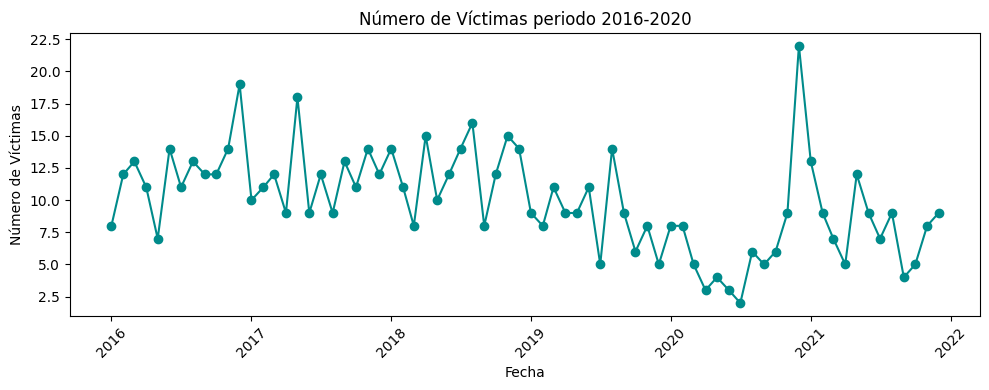

In [ ]:
# Agrupar por año y mes, y sumar el número de víctimas
rel_tiempo = df_hechos_copy.groupby(['anio', 'mes'])['n_victimas'].sum().reset_index()

#Para la realización del gráfico se transforman los datos a tipo int
rel_tiempo["anio"]= rel_tiempo["anio"].astype("Int64")
rel_tiempo["mes"]= rel_tiempo["mes"].astype("Int64")

# Combinar AÑO y MES para obtener una sola variable de tiempo, creando la columna "Fecha" como str
rel_tiempo["fecha"] = rel_tiempo["anio"].astype(str) + '-' + rel_tiempo["mes"].astype(str)

# Convertir la variable de tiempo a formato datetime
rel_tiempo["fecha"] = pd.to_datetime(rel_tiempo["fecha"])

# Ordenar el DataFrame por fecha para que tenga orden cronológico
rel_tiempo = rel_tiempo.sort_values("fecha")
# Crear el gráfico de líneas
plt.figure(figsize=(10, 4))
plt.plot(rel_tiempo["fecha"], rel_tiempo["n_victimas"], marker='o', color='darkcyan')

# Añadir títulos y etiquetas
plt.title('Número de Víctimas periodo 2016-2020')
plt.xlabel('Fecha')
plt.ylabel('Número de Víctimas')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Durante el periodo estudiado se puede apreciar una baja en la frecuencia de siniestros viales durante el 2020, se entiende que es por efecto de las restricciones de movilidad por la pandemia de SARS COV2, para luego generarse un pico de casos durante el 2021. Se observa que durante 2022 bajan considerablemente los casos, existiendo una leve tendencia a la baja con respecto del último año comparable 2020.

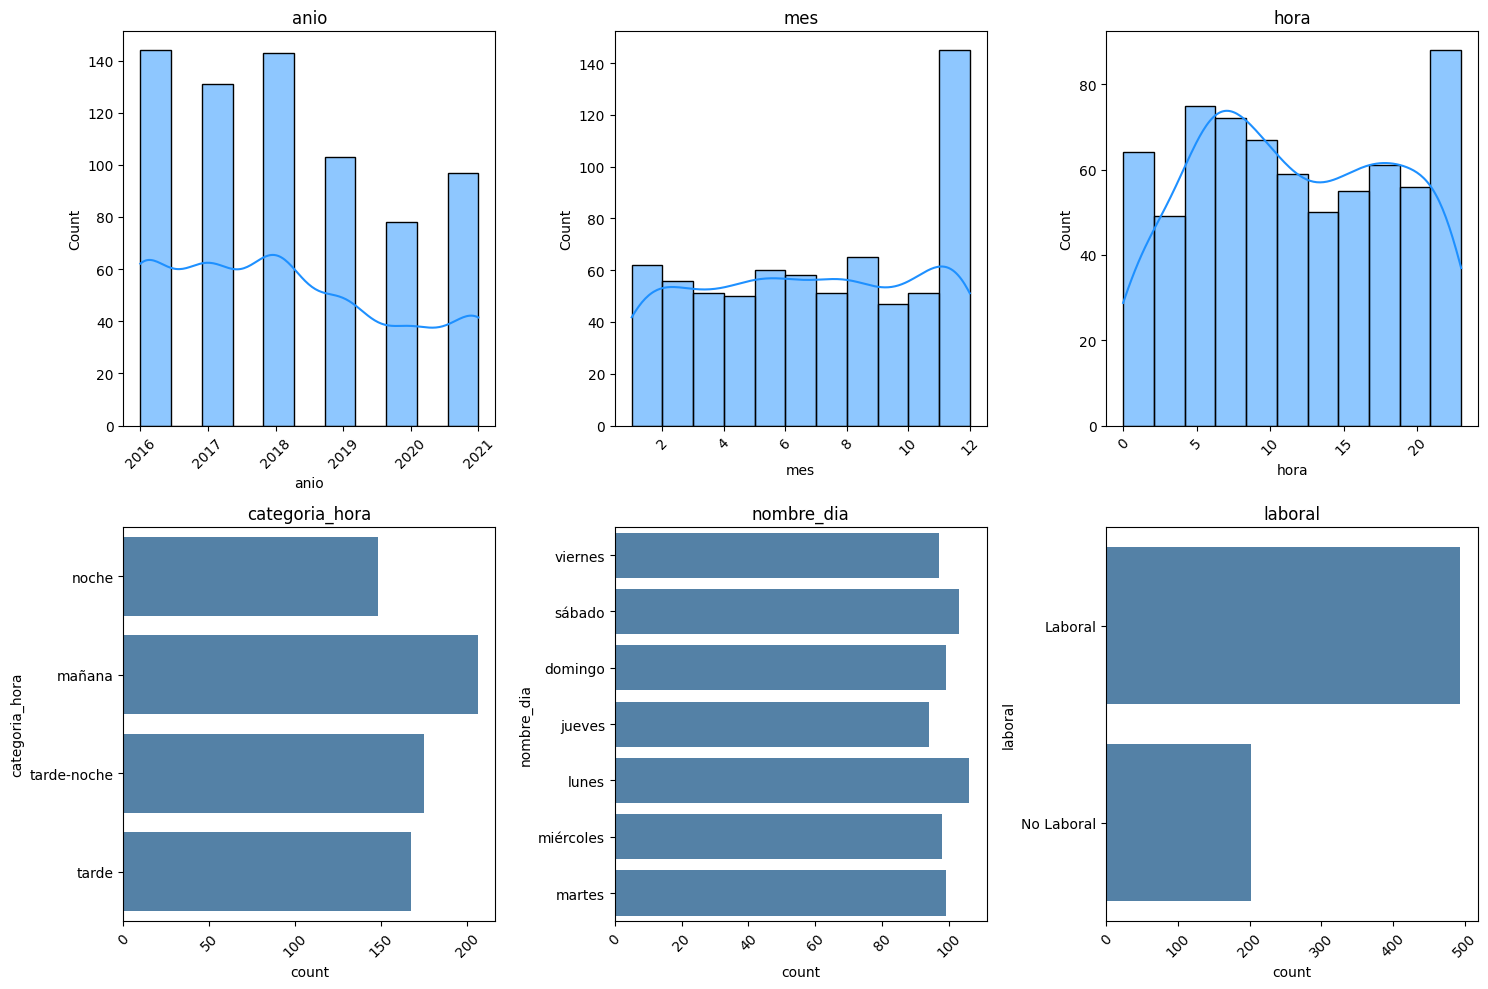

In [ ]:

def plot_distribution(data_df, cols=5, width=15, height=10):
    # Función para graficar la distribución de cada columna en el dataset
    # Crear una figura con el tamaño definido por los parámetros width y height
    fig = plt.figure(figsize=(width, height))
    
    # Calcular el número de filas necesarias para acomodar todas las columnas en la gráfica
    # Se utiliza math.ceil para redondear hacia arriba en caso de que no sea divisible por cols
    rows = math.ceil(float(data_df.shape[1]) / cols)
    # Iterar sobre cada columna en el dataset
    for i, column in enumerate(data_df.columns):
        # Crear subplots, añadiendo cada uno en su posición dentro de la cuadrícula de filas y columnas
        ax = fig.add_subplot(rows, cols, i + 1)
        
        # Establecer el título de cada subplot como el nombre de la columna actual
        ax.set_title(column)
        
        # Verifica si la columna es categórica (tipo 'object')
        if data_df.dtypes[column] == object:
            # Usar un gráfico de barras (countplot) para columnas categóricas
            sns.countplot(data=data_df, y=column, ax=ax, color='steelblue')
            # Rotar los ticks del eje X para mejorar la visualización en caso de nombres largos
            plt.xticks(rotation=45)
        else:
            # Usar un histograma con KDE (estimación de densidad) para columnas numéricas
            sns.histplot(data_df[column], ax=ax, kde=True, color= 'dodgerblue')
            # Rotar los ticks del eje X para mejorar la visualización
            plt.xticks(rotation=45)
    
    # Ajustar el layout de la figura para evitar solapamientos entre subplots
    plt.tight_layout()
df =df_hechos_copy[['anio','mes', 'hora', 'categoria_hora','nombre_dia', 'laboral']]
plot_distribution(df, cols=3)

* Gráfico Año: Complementando el gráfico anterior, ahora podemos apreciar con mayor claridad que la gran cantidad de víctimas lesionadas o fallecidas ocurrió entre los años 2016 y 2018. Hubo una gran baja en el año 2019, último año comparable antes de la pandemia, para volver a elevarse la cantidad de víctimas en el año 2021, pero con cierta tendencia a la baja.

* Gráfico Mes: Si acumulamos la cantidad de víctimas agrupadas por mes de ocurrencia de accidentes viales, el gráfico nos muestra que es el mes de diciembre donde más han ocurrido más hechos viales, más que doblando la cantidad de hechos viales que el mes más cercano, el mes de agosto.

* Gráfico Hora: Respecto a la hora en que han sucedido más siniestros viales, esta es a las 07 de la mañana, que coincide con la hora en que las personas se están trasladando a la ciudad ya sea para trabajar, estudiar u otras obligaciones.
* Gráfico Categoría Hora: muestra que la mayor cantidad de siniestros viales ocurren en el horario que va entre las 06:00 de la mañana y hasta las 12:00, cuando las personas se trasladan a la ciudad y existe una mayor concentración de personas y vehículos.
Gráfico Día con nombre: Aquí podemos ver que el día Lunes es el más acontecido de hechos viales.
Por último, al separar los días en Laborales y No Laborales, el gráfico nos muestra que una gran cantidad de personas son víctimas de siniestros viales en los días laborales.

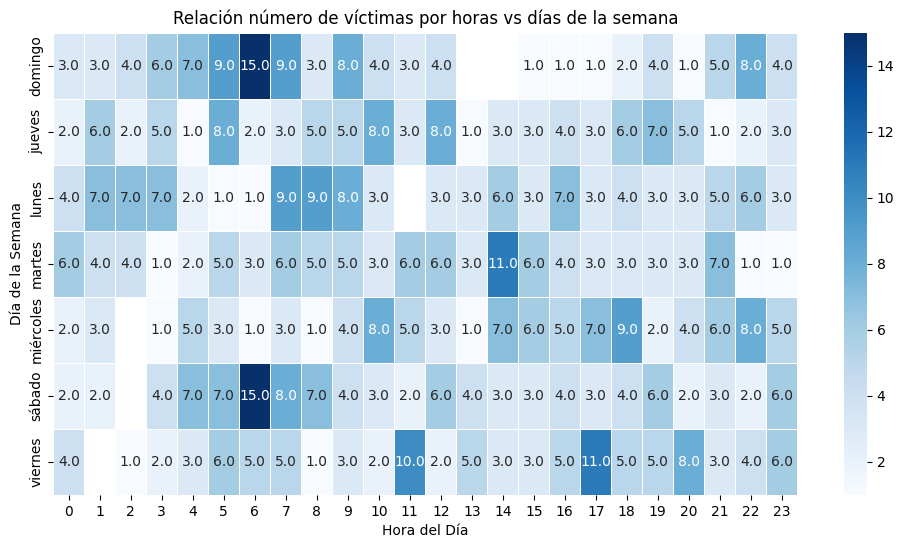

In [266]:
#Agrupa los datos en cantidad de victimas por dia de la semana y horas 
data = df_hechos_copy.groupby(['nombre_dia', "hora"])['n_victimas'].sum().reset_index()

# Crear una tabla pivot para los datos
pivot_data = data.pivot_table(index= 'nombre_dia', columns='hora', values='n_victimas', aggfunc='sum')

# Crear un mapa de calor (heatmap)
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, cmap='Blues', annot=True, fmt='.1f', linewidths=0.5)

# Configurar etiquetas y título
plt.xlabel('Hora del Día')
plt.ylabel('Día de la Semana')
plt.title('Relación número de víctimas por horas vs días de la semana')

# Mostrar el gráfico
plt.show()


Se puede identificar que hay una gran concentración de accidentes los días sábados y domindos, en horarios durante la madrugada, que van desde las 4 a 7 de la mañana.

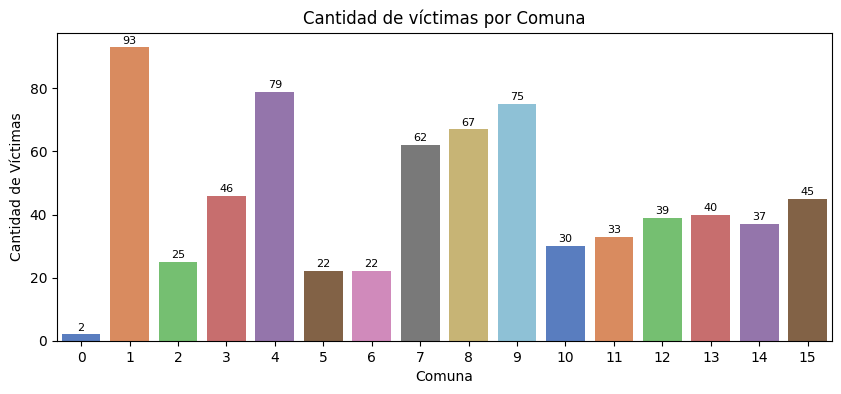

In [ ]:
# Se agrupa por la cantidad de víctimas por mes
data = df_hechos_copy.groupby(['comuna'])['n_victimas'].sum().reset_index()
data["comuna"]=data["comuna"].astype("Int64")

# Se grafica
plt.figure(figsize=(10,4))

ax = sns.barplot(x='comuna', y='n_victimas', data=data, palette="muted")
ax.set_title('Cantidad de víctimas por Comuna')
ax.set_xlabel('Comuna') ; ax.set_ylabel('Cantidad de Víctimas')

# Agregar etiquetas de número de víctimas en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Se muestra el gráfico
plt.show()

Respecto a este gráfico, la mayor cantidad de accidentes ocurren en la comuna 1, que corresponde a la ciudad de Buenos Aires, que integra a los barrios de Retiro, San Nicolás, Puerto Madero, San Telmo, Montserrat y Constitución. 
Le siguen la comuna 4, con 79 casos y la comuna 9 en tercer lugar.

Revisemos ahora, a través de una nube de palabras, los nombres de calles, avenidas y autopistas que más se repiten y están asociados a la ocurrencia de más siniestros viales.

In [ ]:
df_cruces= df_hechos_copy['cruce']
df_cruces.replace()


0      FERNANDEZ DE LA CRUZ, F., GRAL. AV.
1                      DE LOS CORRALES AV.
2                      DE LOS CORRALES AV.
3                 VILLEGAS, CONRADO, GRAL.
4                  SAENZ PE?A, LUIS, PRES.
                      ...                 
691                                    MOM
692                            LACARRA AV.
693                                TERRADA
694                                TERRADA
695                                TERRADA
Name: cruce, Length: 696, dtype: object

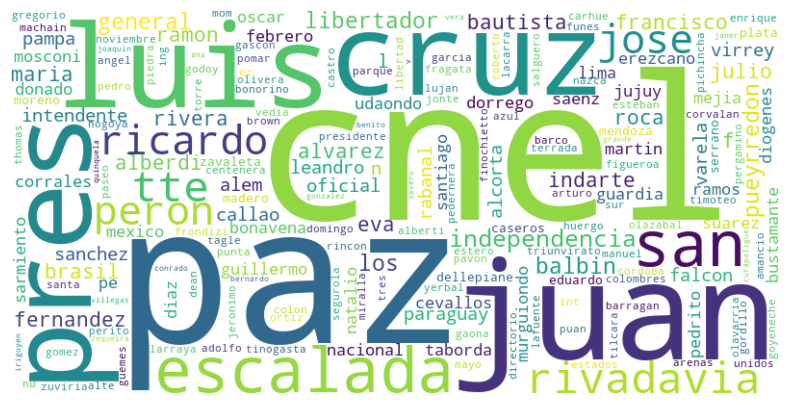

In [ ]:
df_cruces= df_hechos_copy['cruce']

# Unir todos los textos en una sola cadena para la nube de palabras, convirtiendo valores no textuales a cadenas
textos = ' '.join(df_hechos_copy['cruce'].dropna().astype(str))

# Convertir a minúsculas
textos = textos.lower()

# Cargar las stopwords predefinidas de WordCloud y añadir palabras no deseadas
stopwords_espanol = set(STOPWORDS)
# Añadir más palabras comunes en español y variaciones no deseadas
stopwords_espanol.update(['del', 'la', 'de', 'en', 'y', 'el', 'av', 'au', 'dr', 'km', 'calle', 'avenida', 'autopista', 'gral'])

# Crear la nube de palabras eliminando las stopwords
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords_espanol, collocations=False).generate(textos)

# Mostrar la nube de palabras usando matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Desactivar los ejes
plt.show()

La nube de palabras nos muestra que Paz es uno de los nombres más frecuentes dentro de las calles, que corrresponden a la Avenida Gral Paz. También son frecuentes el nombre de juan, que puede estar asociado a varias avenidas, Moreno, Rivadavia, libertador, que provienen de las avenidas respectivas.

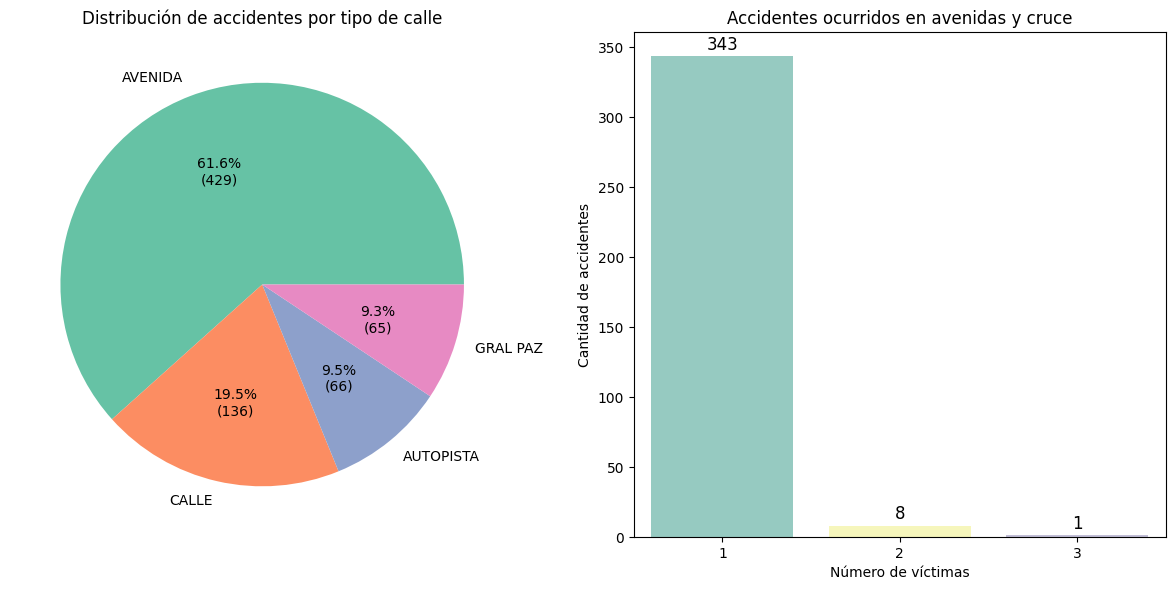

In [ ]:
# Filtrar los accidentes ocurridos en avenidas con cruces
accidentes_avenida = df_hechos_copy[(df_hechos_copy['tipo_calle'] == 'AVENIDA') & (df_hechos_copy['cruce'].notnull())]

# Crear la figura y los subplots (2 gráficos uno al lado del otro)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Función para mostrar porcentaje y valor en las etiquetas del gráfico de pastel
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))  # Valor absoluto
        return f'{pct:.1f}%\n({val})'  # Porcentaje + valor absoluto
    return my_format

# Gráfico 1: Cantidad de accidentes por tipo de calle (gráfico de pastel)
tipo_calle_counts = df_hechos_copy['tipo_calle'].value_counts()
axes[0].pie(tipo_calle_counts, labels=tipo_calle_counts.index, autopct=autopct_format(tipo_calle_counts), colors=sns.color_palette("Set2"))
axes[0].set_title('Distribución de accidentes por tipo de calle')

# Gráfico 2: Accidentes ocurridos en avenidas con cruce (gráfico de barras)
ax2 = sns.countplot(data=accidentes_avenida, x='n_victimas', ax=axes[1], palette="Set3")
axes[1].set_title('Accidentes ocurridos en avenidas y cruce')
axes[1].set_ylabel('Cantidad de accidentes')
axes[1].set_xlabel('Número de víctimas')

# Añadir etiquetas de conteo en las barras del gráfico 2
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='baseline', fontsize=12, color='black', 
                 xytext=(0, 5), textcoords='offset points')

# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Este gráfico nos muestra que de las 429 siniestros viales, una gran parte de estos siniestros viales ocurren en cruces, estos es 352 siniestros viales, que corresponden al 50.6% del total de siniestros viales.

In [ ]:
# Agrupar por mes, y sumar el número de víctimas
rel_tiempo = df_hechos_copy.groupby(['mes'])['n_victimas'].sum()
# Mostrar más columnas
pd.set_option('display.max_columns', 100)  # Cambia este número según lo necesites
rel_tiempo.T

mes
1     62
2     59
3     56
4     52
5     60
6     58
7     51
8     67
9     51
10    52
11    68
12    81
Name: n_victimas, dtype: int64

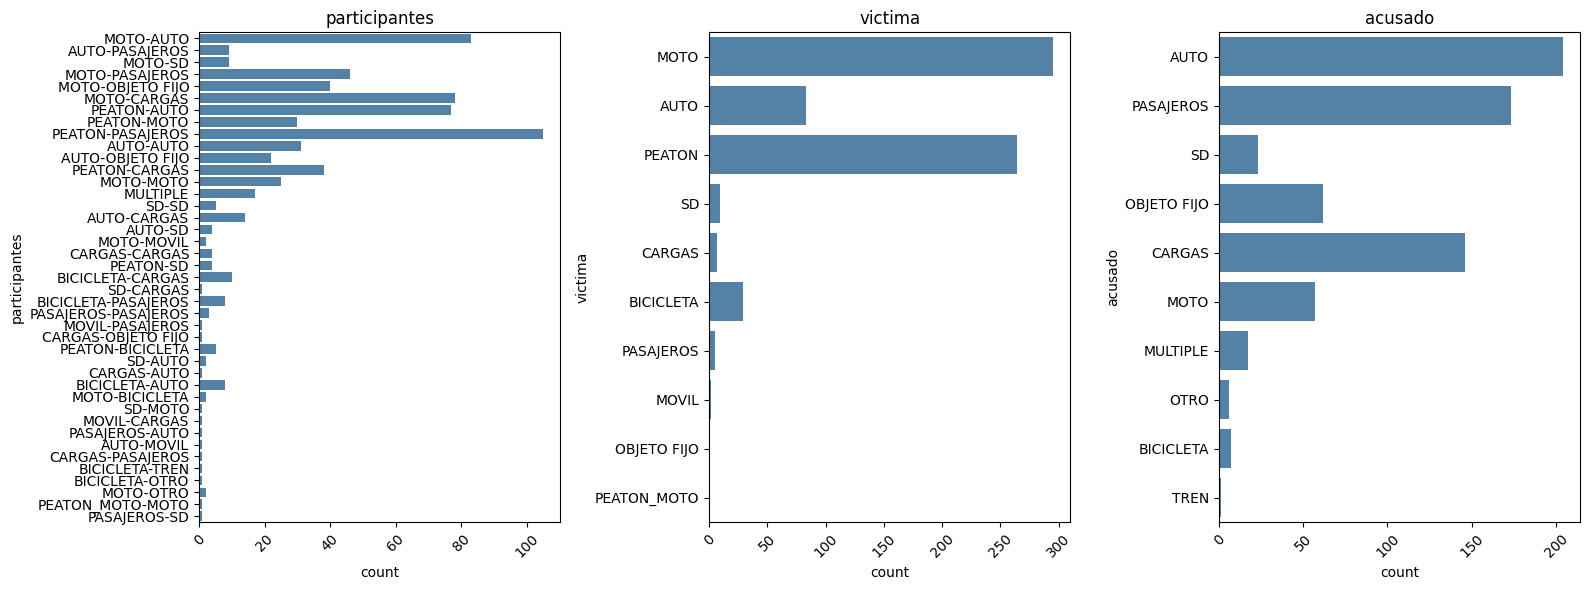

In [ ]:
def plot_distribution(data_df, cols=5, width=16, height=6):
    # Función para graficar la distribución de cada columna en el dataset
    # Crear una figura con el tamaño definido por los parámetros width y height
    fig = plt.figure(figsize=(width, height))
    
    # Calcular el número de filas necesarias para acomodar todas las columnas en la gráfica
    # Se utiliza math.ceil para redondear hacia arriba en caso de que no sea divisible por cols
    rows = math.ceil(float(data_df.shape[1]) / cols)
    # Iterar sobre cada columna en el dataset
    for i, column in enumerate(data_df.columns):
        # Crear subplots, añadiendo cada uno en su posición dentro de la cuadrícula de filas y columnas
        ax = fig.add_subplot(rows, cols, i + 1)
        
        # Establecer el título de cada subplot como el nombre de la columna actual
        ax.set_title(column)
        
        # Verifica si la columna es categórica (tipo 'object')
        if data_df.dtypes[column] == object:
            # Usar un gráfico de barras (countplot) para columnas categóricas
            sns.countplot(data=data_df, y=column, ax=ax, color='steelblue')
            # Rotar los ticks del eje X para mejorar la visualización en caso de nombres largos
            plt.xticks(rotation=45)
        else:
            # Usar un histograma con KDE (estimación de densidad) para columnas numéricas
            sns.histplot(data_df[column], ax=ax, kde=True, color= 'dodgerblue')
            # Rotar los ticks del eje X para mejorar la visualización
            plt.xticks(rotation=45)
    
    # Ajustar el layout de la figura para evitar solapamientos entre subplots
    plt.tight_layout()
df2 =df_hechos_copy[[ 'participantes', 'victima', 'acusado']]
plot_distribution(df2, cols=3)

Los participantes en siniestros viales que más se repiten están asociados a la dupla peatón-pasajeros. También son importantes los siniestros viales ocurridos entre moto-auto, moto-cargas y peatón-auto. Esto indicaría que estas duplas de participantes son las más expuestas , donde la tasa de fatalidad o lesiones es alta dado que tanto peatones y motos están super expuestos a lesiones graves si son impactados a gran velocidad, a diferencia de alguien que sufre un accidente y va en un auto con sistema airbags, por ejemplo. Esto se refleja en el siguiente gráfico 'victima' donde las víctimas más frecuentes son peatones y motociclistas. Respecto al vehículo que ocupaba quien resultó acusado del hecho, en su mayor parte los acusados de distribuyen entre auto, pasajeros, y cargas.

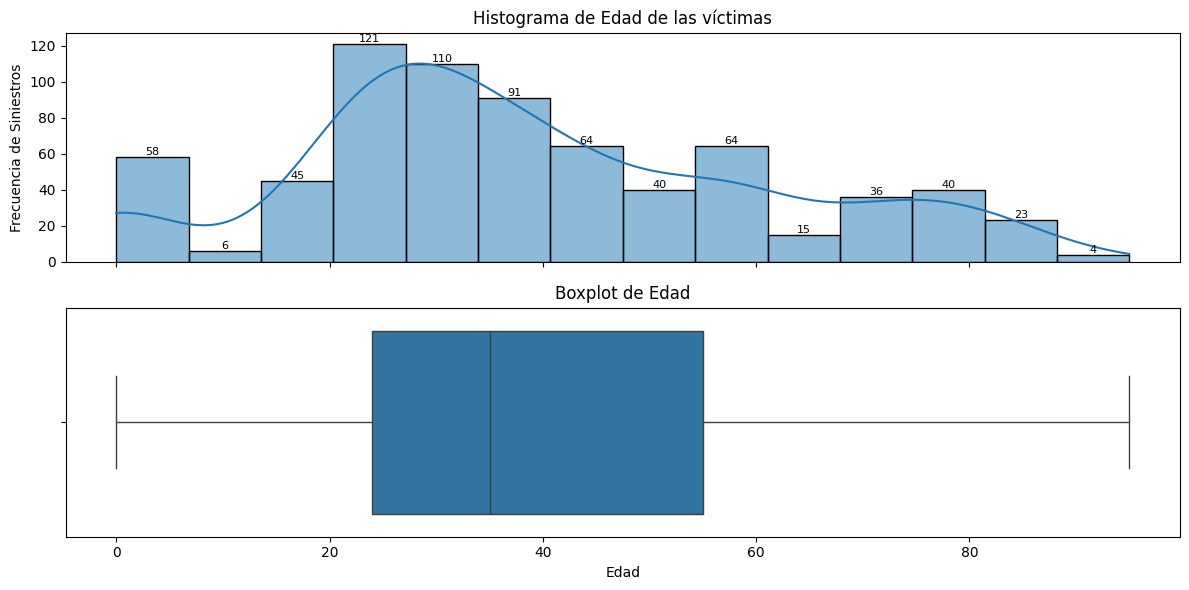

In [240]:
# Se crea una figura con un solo eje x compartido para tener dos gráficos en uno
fig, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# Se grafica el histograma de la edad
sns.histplot(df_victimas_copy['edad'], kde=True, ax=ax[0]) #se agrega la línea de suavizado
ax[0].set_title('Histograma de Edad de las víctimas') ; ax[0].set_ylabel('Frecuencia de Siniestros')

# Se agregan etiquetas de datos en el histograma
for p in ax[0].patches:
    ax[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8, color='black')

# Se grafica el boxplot de la edad
sns.boxplot(x=df_victimas_copy['edad'], ax=ax[1])
ax[1].set_title('Boxplot de Edad') ; ax[1].set_xlabel('Edad')

# Se ajusta y muestra el gráfico
plt.tight_layout()
plt.show()

Tabla contingencia Acusado -Victima

In [252]:
tabla_contingencia = pd.crosstab(df_hechos_copy['victima'], df_hechos_copy['acusado'])

# Visualizar la tabla de contingencia
tabla_contingencia

acusado      AUTO  BICICLETA  CARGAS  MOTO  MULTIPLE  OBJETO FIJO  OTRO  \
victima                                                                   
AUTO           31          0      14     0         3           21     1   
BICICLETA       8          0      10     0         1            0     1   
CARGAS          1          0       4     0         0            1     0   
MOTO           83          2      78    25         8           40     4   
MOVIL           0          0       1     0         0            0     0   
OBJETO FIJO     1          0       0     0         0            0     0   
PASAJEROS       1          0       0     0         0            0     0   
PEATON         77          5      38    30         5            0     0   
PEATON_MOTO     0          0       0     1         0            0     0   
SD              2          0       1     1         0            0     0   

acusado      PASAJEROS  SD  TREN  
victima                           
AUTO                 9   4     0  
BICICLETA            8   0     1  
CARGAS               1   0     0  
MOTO                46   9     0  
MOVIL                1   0     0  
OBJETO FIJO          0   0     0  
PASAJEROS            3   1     0  
PEATON             105   4     0  
PEATON_MOTO          0   0     0  
SD                   0   5     0

En esta matriz podemos la relación que existe entre acusados y víctimas
- Cuando el acusado es quien se moviliza en un auto, la mayor parte de las víctimas son personas que se transportan en motos, pero también una gran cantidad de peatones también son afectados.
- Cuando el acusado es quien conduce un vehículo de carga, los siniestrados son en su mayor parte motos y en segundo lugar peatones.
- En el caso de las motos, los afectados son petones en primer lugar y en segundo otras personas que se transportan en motos.
- Los Pasajeros son causantes de una gran cantidad de víctimas peatones, en este caso 105. También 

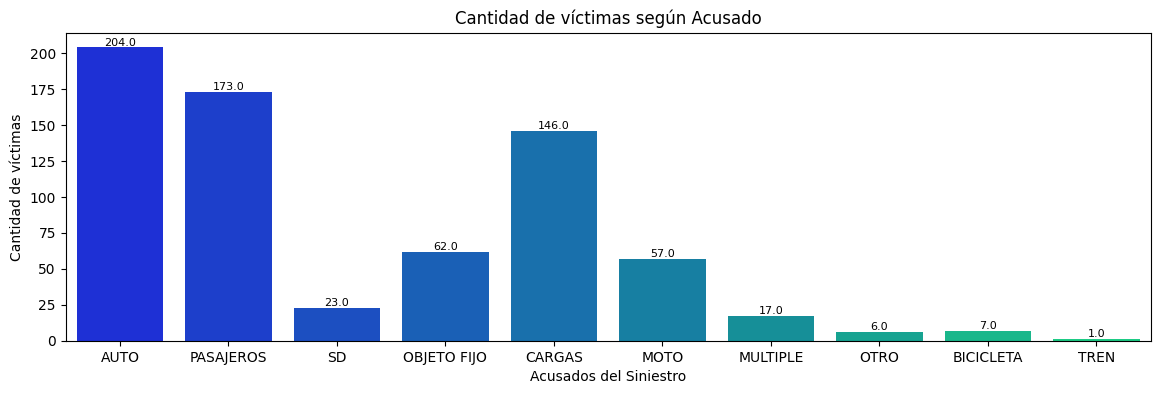

In [242]:
#Se crea el gráfico de barras
plt.figure(figsize=(14, 4))

ax=sns.countplot(df_hechos_copy, x="acusado", palette="winter")

# Agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)


#Se titulan los ejes
plt.xlabel('Acusados del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctimas según Acusado')

plt.show()

Una mayor parte de los acusados son personas que se transportan en vehiculo, lo que no es de extrañar ya que el parque automotor lo componen en su mayoría este tipo de vehíiculos.
Los pasajeros son, en segundo lugar, culpables de 173 siniestros viales.
En tercer lugar se encuentra el transporte de cargas, con 146 víctimas afectadas.

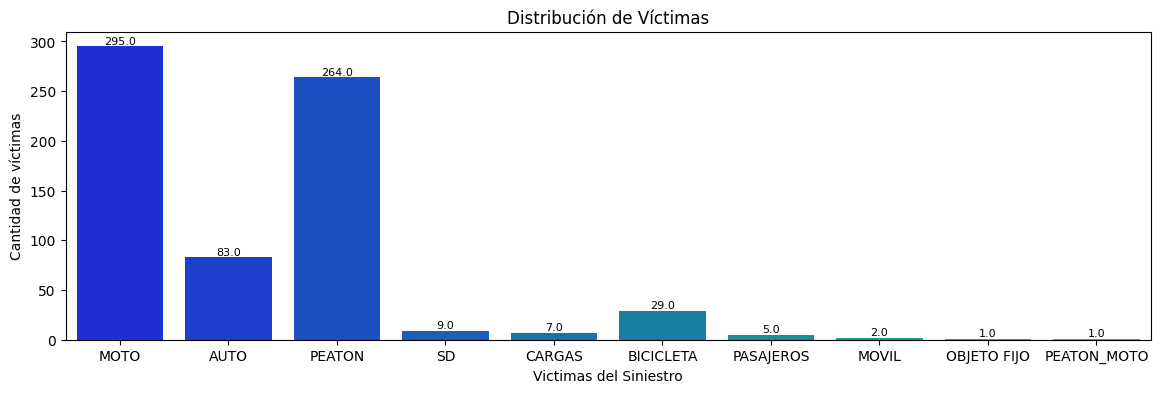

In [243]:
#Se crea el gráfico de barras
plt.figure(figsize=(14, 4))

ax=sns.countplot(df_hechos_copy, x="victima", palette="winter")

# Agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)


#Se titulan los ejes
plt.xlabel('Victimas del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Distribución de Víctimas')

plt.show()

Como ya habíamos visto, la mayor parte de los afectados corresponde a motos y peatones. En menor grado, los afectados son quienes se movilizan en auto al momento del siniestro.

Text(0.5, 1.0, 'Proporción de Víctimas por Sexo')

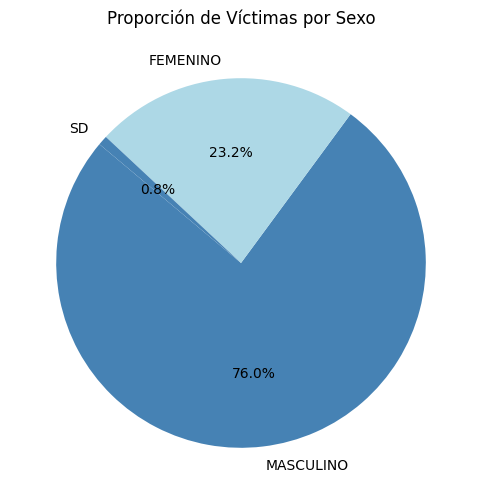

In [248]:
# Calcular la proporción de víctimas por sexo
proporcion = df_victimas_copy['sexo'].value_counts(normalize=True) * 100

# Preparar los datos para el gráfico de torta
labels = proporcion.index
sizes = proporcion.values

# Crear el gráfico de torta
plt.figure(figsize=(12, 6))

# Gráfico de torta

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['steelblue', 'lightblue'])
plt.title('Proporción de Víctimas por Sexo')

El 76% de los afectados que tiene la base de datos, son de sexo masculino y un 23% masculino. 